# Практикум Эчеверриа Арамбильета Антона, 316 (R)

In [71]:
# при необходимости: install.packages(c("tidyverse", "patchwork"))

library(tidyverse)
library(patchwork)
library(mice)
library(dplyr)
library(ggplot2)
library(nortest)
library(MASS)
library(zoo)
library(dixonTest)
library(outliers)
library(qqplotr)
library(glue)

theme_set(theme_minimal())
options(dplyr.summarise.inform = FALSE)

## Презентация датасета

В датасете рассматриваются некоторые биологические показатели людей (кроме лёгочных). На основе этих данных предлагается предсказать, является ли человек курильщиком

In [74]:
# загрузка
df <- read_csv("smoker.csv")

# просмотр
head(df)
glimpse(df)

Rows: 38984 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (23): age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,⋯,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,170,85,97,0.9,0.9,1,1,118,78,⋯,70,142,19.8,1,1.0,61,115,125,1,1
20,175,110,110,0.7,0.9,1,1,119,79,⋯,71,114,15.9,1,1.1,19,25,30,1,0
45,155,65,86,0.9,0.9,1,1,110,80,⋯,57,112,13.7,3,0.6,1090,1400,276,0,0
45,165,80,94,0.8,0.7,1,1,158,88,⋯,46,91,16.9,1,0.9,32,36,36,0,0
20,165,60,81,1.5,0.1,1,1,109,64,⋯,47,92,14.9,1,1.2,26,28,15,0,0
60,160,50,78,1.0,0.9,2,2,126,75,⋯,98,64,13.9,1,1.0,47,23,70,0,1


Rows: 38,984
Columns: 23
$ age                   <dbl> 35, 20, 45, 45, 20, 60, 40, 40, 40, 45, 40, 50, …
$ `height(cm)`          <dbl> 170, 175, 155, 165, 165, 160, 175, 180, 170, 155…
$ `weight(kg)`          <dbl> 85, 110, 65, 80, 60, 50, 90, 75, 60, 55, 60, 50,…
$ `waist(cm)`           <dbl> 97.0, 110.0, 86.0, 94.0, 81.0, 78.0, 95.0, 85.0,…
$ `eyesight(left)`      <dbl> 0.9, 0.7, 0.9, 0.8, 1.5, 1.0, 0.9, 1.5, 1.2, 0.7…
$ `eyesight(right)`     <dbl> 0.9, 0.9, 0.9, 0.7, 0.1, 0.9, 1.0, 1.5, 1.5, 1.0…
$ `hearing(left)`       <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ `hearing(right)`      <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ systolic              <dbl> 118, 119, 110, 158, 109, 126, 130, 110, 89, 114,…
$ relaxation            <dbl> 78, 79, 80, 88, 64, 75, 88, 60, 57, 81, 80, 64, …
$ `fasting blood sugar` <dbl> 97, 88, 80, 249, 100, 114, 90, 100, 83, 96, 94, …
$ Cholesterol           <dbl> 239, 211, 193, 210, 179, 177, 207, 170, 178, 184…
$ triglyceride 

In [76]:
summary(df)

      age          height(cm)      weight(kg)       waist(cm)     
 Min.   :20.00   Min.   :130.0   Min.   : 30.00   Min.   : 51.00  
 1st Qu.:40.00   1st Qu.:160.0   1st Qu.: 55.00   1st Qu.: 76.00  
 Median :40.00   Median :165.0   Median : 65.00   Median : 82.00  
 Mean   :44.13   Mean   :164.7   Mean   : 65.94   Mean   : 82.06  
 3rd Qu.:55.00   3rd Qu.:170.0   3rd Qu.: 75.00   3rd Qu.: 88.00  
 Max.   :85.00   Max.   :190.0   Max.   :135.00   Max.   :129.00  
 eyesight(left)  eyesight(right) hearing(left)   hearing(right) 
 Min.   :0.100   Min.   :0.100   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.800   1st Qu.:0.800   1st Qu.:1.000   1st Qu.:1.000  
 Median :1.000   Median :1.000   Median :1.000   Median :1.000  
 Mean   :1.015   Mean   :1.009   Mean   :1.025   Mean   :1.026  
 3rd Qu.:1.200   3rd Qu.:1.200   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :9.900   Max.   :9.900   Max.   :2.000   Max.   :2.000  
    systolic       relaxation     fasting blood sugar  Cholesterol   
 Min. 

In [78]:
colSums(is.na(df)) == 0  # Вернёт TRUE для колонок без пропусков

age          height(cm)          weight(kg)           waist(cm) 
               TRUE                TRUE                TRUE                TRUE 
     eyesight(left)     eyesight(right)       hearing(left)      hearing(right) 
               TRUE                TRUE                TRUE                TRUE 
           systolic          relaxation fasting blood sugar         Cholesterol 
               TRUE                TRUE                TRUE                TRUE 
       triglyceride                 HDL                 LDL          hemoglobin 
               TRUE                TRUE                TRUE                TRUE 
      Urine protein    serum creatinine                 AST                 ALT 
               TRUE                TRUE                TRUE                TRUE 
                Gtp       dental caries             smoking 
               TRUE                TRUE                TRUE

### В датасете отсутствуют какие-либо пропуски, что значительно упрощает дальнейший анализ

## Аппроксимация распределения данных с помощью ядерных оценок

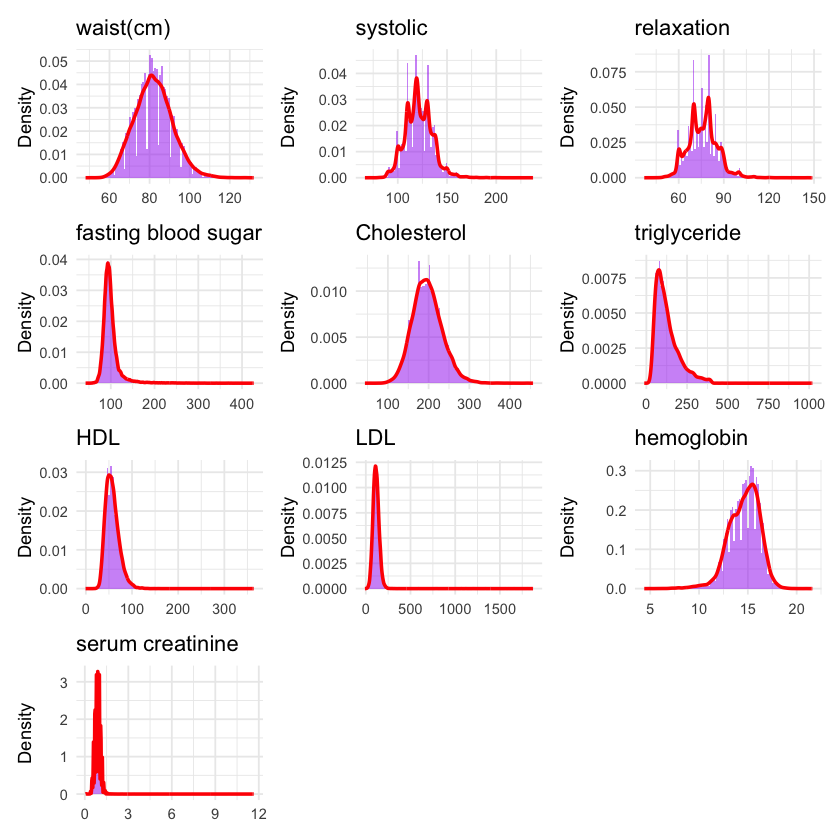

In [82]:
columns <- c(
  "waist(cm)","systolic","relaxation","fasting blood sugar",
  "Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine"
)

plot_hist_kde <- function(df, col, bins = 100) {
  v <- df[[col]]
  v <- v[is.finite(v)]
  d <- density(v, kernel = "gaussian")
  dd <- tibble(x = d$x, y = d$y)
  
  ggplot(tibble(val = v), aes(val)) +
    geom_histogram(aes(y = after_stat(density)), bins = bins, fill = "purple", alpha = 0.5) +
    geom_line(data = dd, aes(x = x, y = y), color = "red", linewidth = 1) +
    labs(title = col, x = NULL, y = "Density")
}

plots <- map(columns, ~plot_hist_kde(df, .x, bins = 100))
wrap_plots(plots, ncol = 3)


In [84]:
unique(df$`serum creatinine`)

[1]  1.0  1.1  0.6  0.9  1.2  1.4  0.7  0.5  0.8  1.3  1.7  0.4  1.9  1.6  1.5
[16]  0.1  2.2  0.3  1.8  3.3  5.9  2.1  7.4  2.5  2.0  6.4  3.0 11.6  2.6  0.2
[31]  3.4  9.9  5.0 10.0

Можно заметить, что признак 'serum creatinine' имеет довольно мало значений, чтобы считать его непрерывным, поэтому будем считать его дискретным

In [87]:
unique(df$`eyesight(left)`)


[1] 0.9 0.7 0.8 1.5 1.0 1.2 0.5 0.3 0.4 0.6 0.1 0.2 9.9 2.0 1.8 1.6 1.1 1.3 1.9

Печеночные признаки ('ALT', 'AST', 'Gtp') имеют довольно тяжелые хвосты, что затрудняет дальнейший анализ. Поэтому будем только рассматривать эти признаки в рамках определенных ограничений

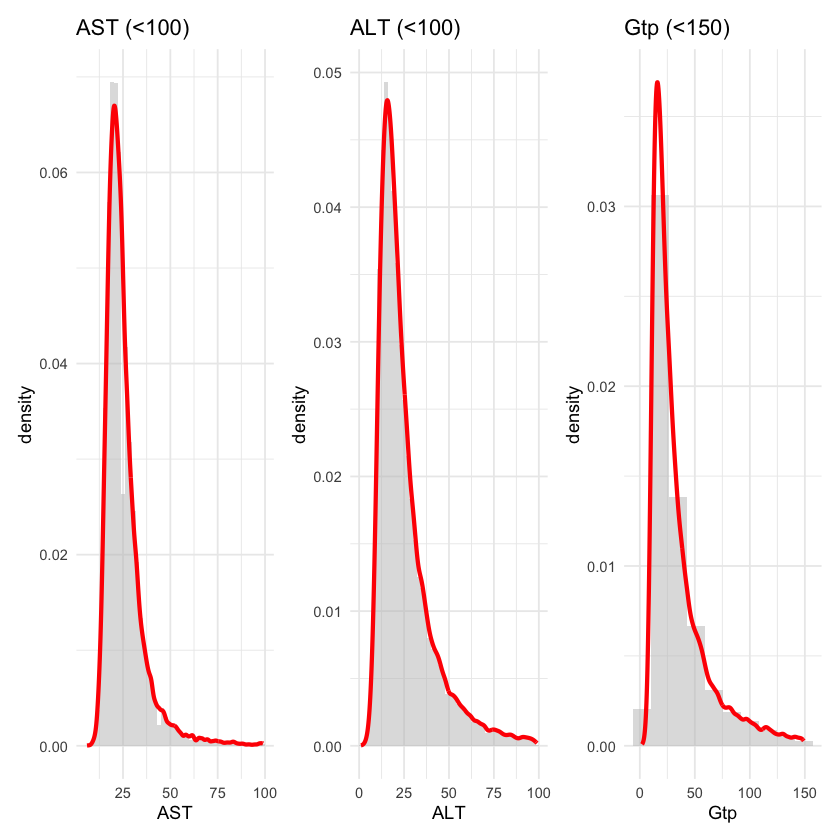

In [90]:
df_ast <- df %>% filter(AST < 100)
df_alt <- df %>% filter(ALT < 100)
df_gtp <- df %>% filter(Gtp < 150)

p1 <- ggplot(df_ast, aes(AST)) +
  geom_histogram(aes(y = after_stat(density)), bins = 50, fill = "grey", alpha = 0.5) +
  geom_density(color = "red", linewidth = 1.2) +
  labs(title = "AST (<100)")

p2 <- ggplot(df_alt, aes(ALT)) +
  geom_histogram(aes(y = after_stat(density)), bins = 50, fill = "grey", alpha = 0.5) +
  geom_density(color = "red", linewidth = 1.2) +
  labs(title = "ALT (<100)")

p3 <- ggplot(df_gtp, aes(Gtp)) +
  geom_histogram(aes(y = after_stat(density)), bins = 10, fill = "grey", alpha = 0.5) +
  geom_density(color = "red", linewidth = 1.2) +
  labs(title = "Gtp (<150)")

p1 + p2 + p3


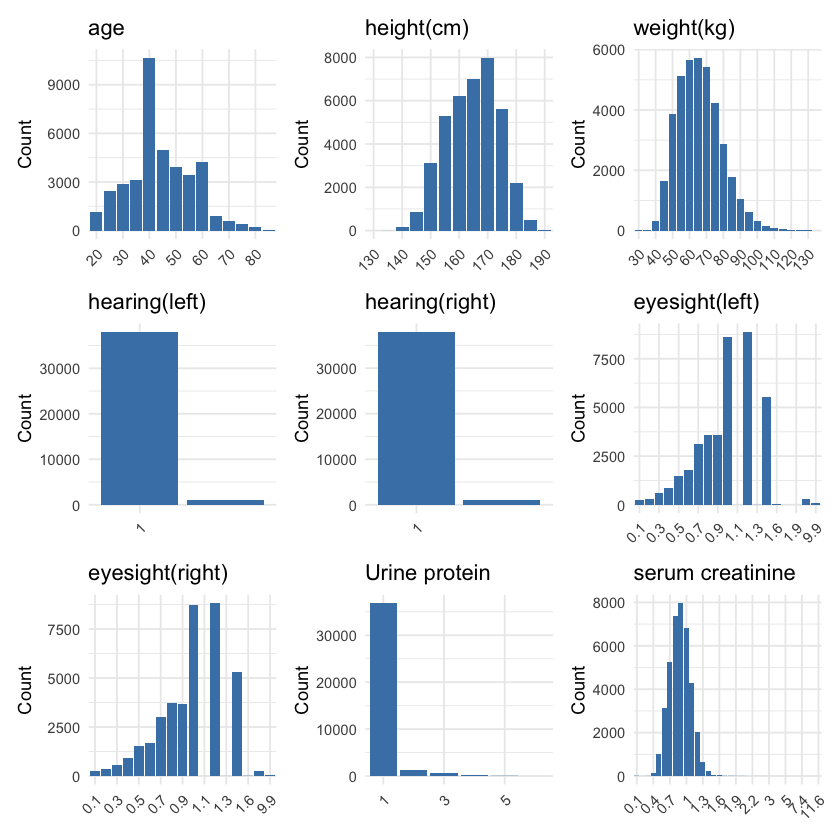

In [91]:
# при необходимости: install.packages("rlang")
library(rlang)

columns_disc <- c(
  "age","height(cm)","weight(kg)",
  "hearing(left)","hearing(right)",
  "eyesight(left)","eyesight(right)",
  "Urine protein","serum creatinine"
)

make_count <- function(df, col, step_default = 2) {
  v <- df[[col]]
  # рисуем как категории, чтобы поведение было как у seaborn.countplot
  lvl <- levels(factor(v))
  step <- if (col == "serum creatinine") 3 else step_default
  brks <- if (length(lvl) > 0) lvl[seq(1, length(lvl), by = step)] else waiver()

  ggplot(df, aes(x = factor(.data[[col]]))) +
    geom_bar(fill = "steelblue") +
    scale_x_discrete(breaks = brks) +
    labs(title = col, x = NULL, y = "Count") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

plots_disc <- purrr::map(columns_disc, ~ make_count(df, .x))
patchwork::wrap_plots(plots_disc, ncol = 3)


In [ ]:
# гемоглобин
ggplot(df, aes(x = hemoglobin, fill = factor(smoking))) +
  geom_density(alpha = 0.4) +
  scale_fill_brewer(palette = "Set2", name = "smoking") +
  labs(title = "Conditional Density Plot for hemoglobin", x = "hemoglobin", y = "Density")

# талия
ggplot(df, aes(x = `waist(cm)`, fill = factor(smoking))) +
  geom_density(alpha = 0.4) +
  scale_fill_brewer(palette = "Set2", name = "smoking") +
  labs(title = "Conditional Density Plot for waist(cm)", x = "waist(cm)", y = "Density")


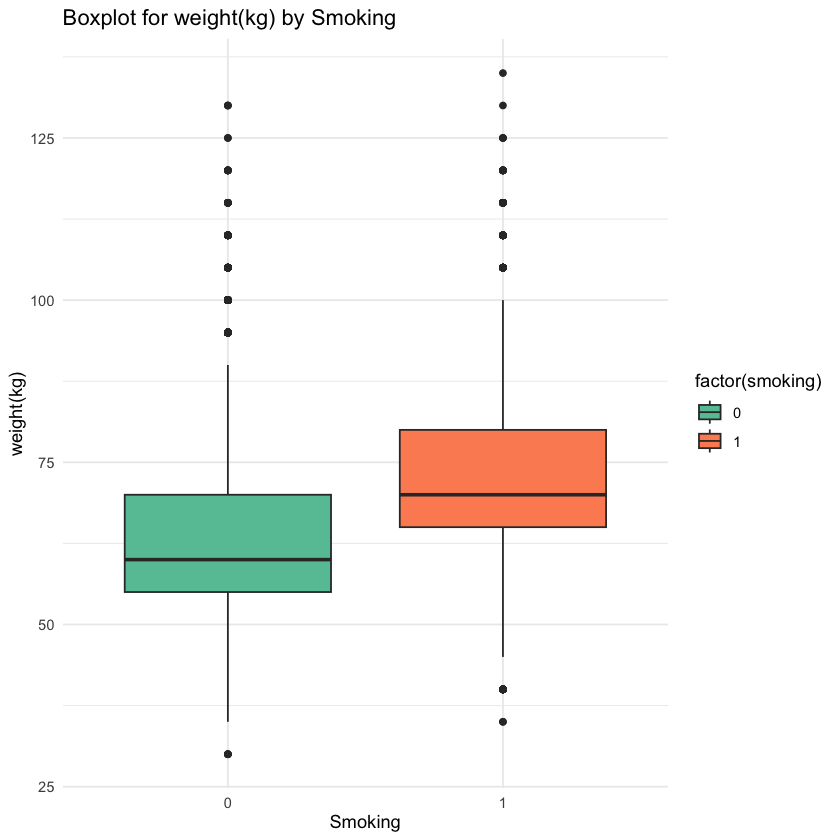

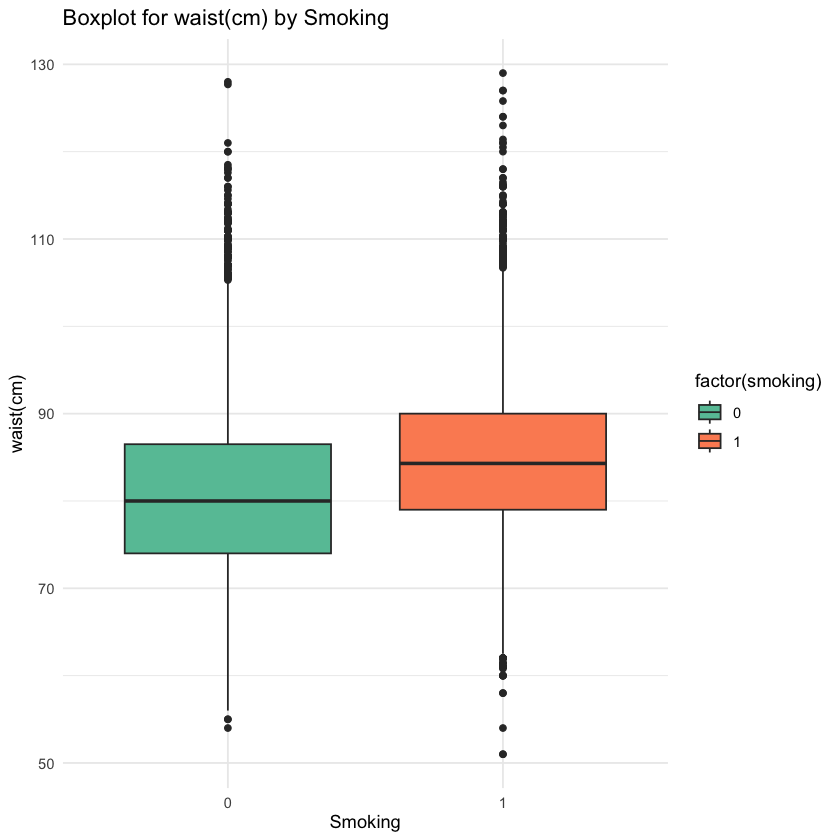

In [93]:
# вес и талия по курению
ggplot(df, aes(x = factor(smoking), y = `weight(kg)`, fill = factor(smoking))) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Boxplot for weight(kg) by Smoking", x = "Smoking", y = "weight(kg)")

ggplot(df, aes(x = factor(smoking), y = `waist(cm)`, fill = factor(smoking))) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Boxplot for waist(cm) by Smoking", x = "Smoking", y = "waist(cm)")


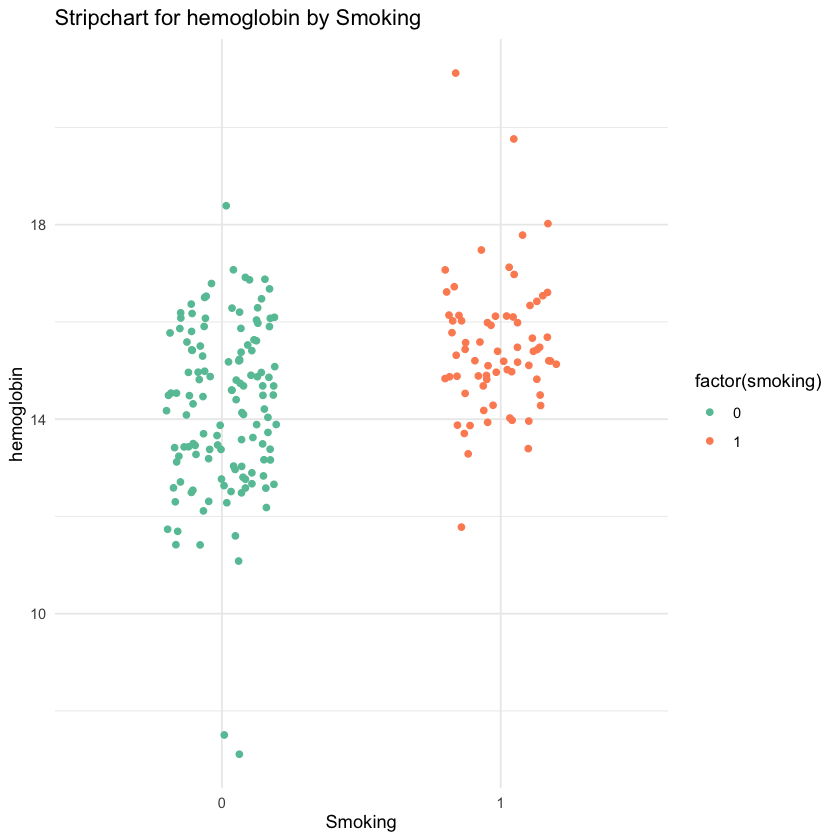

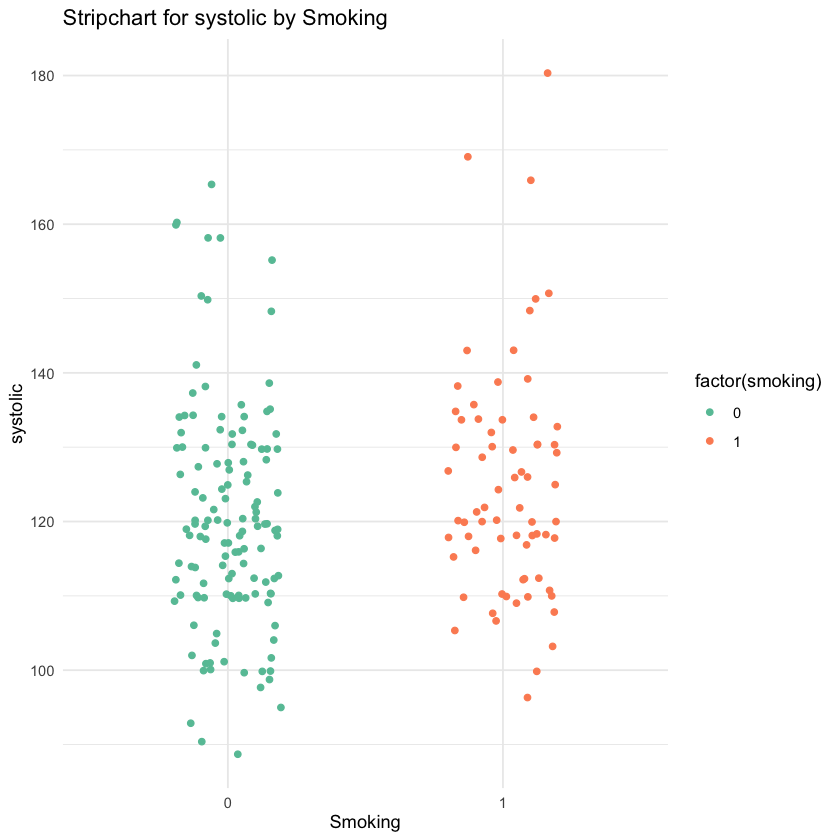

In [95]:
df_small <- df[1:200, ]
ggplot(df_small, aes(x = factor(smoking), y = hemoglobin, color = factor(smoking))) +
  geom_jitter(width = 0.2) +
  scale_color_brewer(palette = "Set2") +
  labs(title = "Stripchart for hemoglobin by Smoking", x = "Smoking", y = "hemoglobin")

ggplot(df_small, aes(x = factor(smoking), y = systolic, color = factor(smoking))) +
  geom_jitter(width = 0.2) +
  scale_color_brewer(palette = "Set2") +
  labs(title = "Stripchart for systolic by Smoking", x = "Smoking", y = "systolic")


# Анализ выбросов

In [98]:
grubbs_results <- list()

for (col in columns) {
  col_data <- df[[col]]
  col_data <- col_data[!is.na(col_data)]

  # проверка наличия выброса
  if (length(col_data) >= 3) {
    test <- grubbs.test(col_data)
    if (test$p.value < 0.05) {
      # извлекаем выброс
      outlier_value <- ifelse(grepl("lowest", test$alternative),
                              min(col_data), max(col_data))
      grubbs_results[[col]] <- list(outlier = outlier_value,
                                    p = test$p.value,
                                    alternative = test$alternative)
    } else {
      grubbs_results[[col]] <- NULL
    }
  }
}

# ---------------------------------
# Тест Диксона (на случайной выборке из 30)
# ---------------------------------
dixon_results <- list()

for (col in columns) {
  col_data <- df[[col]]
  col_data <- col_data[!is.na(col_data)]

  if (length(col_data) >= 30) {
    sample_data <- sample(col_data, 30)
    test <- dixon.test(sample_data)
    if (test$p.value < 0.05) {
      dixon_results[[col]] <- list(outlier = test$statistic,
                                   p = test$p.value,
                                   alternative = test$alternative)
    } else {
      dixon_results[[col]] <- NULL
    }
  } else {
    dixon_results[[col]] <- "Выборка слишком мала"
  }
}

In [100]:
cat("Результаты теста Граббса:\n")
for (col in names(grubbs_results)) {
  res <- grubbs_results[[col]]
  if (!is.null(res)) {
    cat(sprintf("%s: выброс = %.3f, p-value = %.4f, %s\n",
                col, res$outlier, res$p, res$alternative))
  } else {
    cat(sprintf("%s: выбросы не обнаружены\n", col))
  }
}

cat("\nРезультаты теста Диксона:\n")
for (col in names(dixon_results)) {
  res <- dixon_results[[col]]
  if (is.character(res)) {
    cat(sprintf("%s: %s\n", col, res))
  } else if (!is.null(res)) {
    cat(sprintf("%s: статистика = %.3f, p-value = %.4f, %s\n",
                col, res$outlier, res$p, res$alternative))
  } else {
    cat(sprintf("%s: выбросы не обнаружены\n", col))
  }
}

Результаты теста Граббса:
waist(cm): выброс = 129.000, p-value = 0.0094, highest value 129 is an outlier
systolic: выброс = 233.000, p-value = 0.0000, highest value 233 is an outlier
relaxation: выброс = 146.000, p-value = 0.0000, highest value 146 is an outlier
fasting blood sugar: выброс = 423.000, p-value = 0.0000, highest value 423 is an outlier
Cholesterol: выброс = 445.000, p-value = 0.0000, highest value 445 is an outlier
triglyceride: выброс = 999.000, p-value = 0.0000, highest value 999 is an outlier
HDL: выброс = 359.000, p-value = 0.0000, highest value 359 is an outlier
LDL: выброс = 1860.000, p-value = 0.0000, highest value 1860 is an outlier
hemoglobin: выброс = 4.900, p-value = 0.0000, lowest value 4.9 is an outlier
serum creatinine: выброс = 11.600, p-value = 0.0000, highest value 11.6 is an outlier

Результаты теста Диксона:
serum creatinine: статистика = 0.571, p-value = 0.0000, highest value 1.5 is an outlier


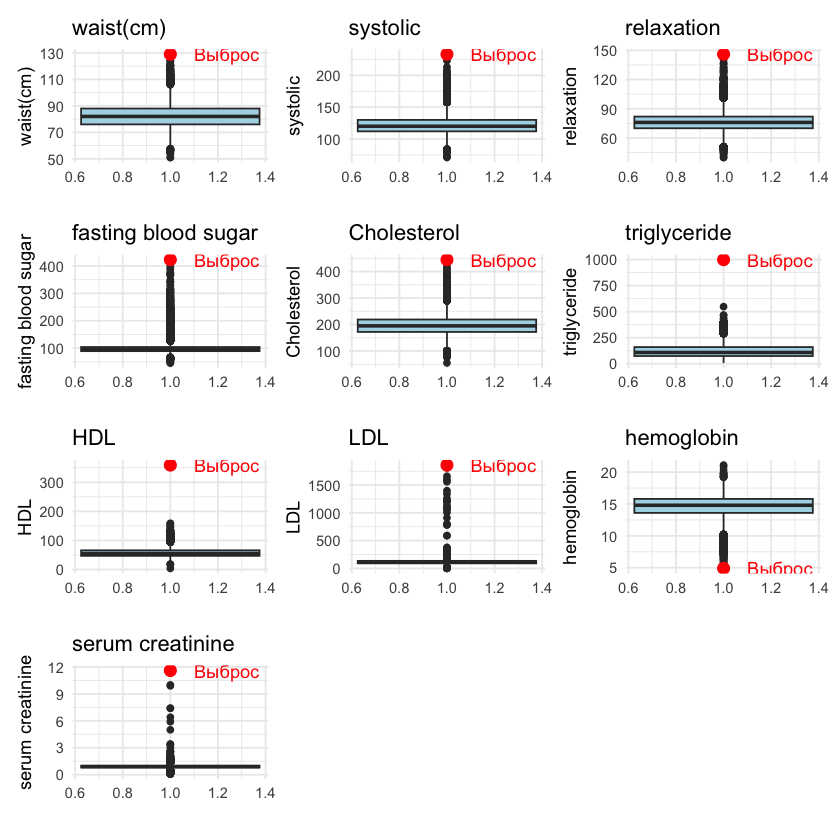

In [102]:
plots <- list()

for (col in columns) {
  p <- ggplot(df, aes(x = 1, y = .data[[col]])) +
    geom_boxplot(fill = "lightblue") +
    labs(title = paste0(col),
         y = col, x = "") +
    theme_minimal()
  
  if (!is.null(grubbs_results[[col]])) {
    outlier_val <- grubbs_results[[col]]$outlier
    # создаём отдельный датафрейм для точки
    point_data <- data.frame(x = 1, y = outlier_val)
    
    p <- p +
      geom_point(data = point_data, aes(x = x, y = y),
                 color = "red", size = 3) +
      geom_text(data = point_data,
                aes(x = x + 0.1, y = y, label = "Выброс"),
                color = "red", hjust = 0)
  }
  
  plots[[col]] <- p
}

wrap_plots(plots, ncol = 3)

# Анализ пропусков

### В данном датасете пропуски отсутствуют => сначала удалим определенное кол-во значений из каждого признака, а потом заполним двумя способами: заполнением средних и ЕМ-алгоритмом. Потом сравним, какой лучше

In [ ]:
set.seed(42)

# выбираем числовые колонки
numerical_cols <- c("age","height(cm)","weight(kg)","waist(cm)","systolic","relaxation",
                    "Cholesterol","triglyceride","HDL","LDL","hemoglobin")

data_sample <- df %>% dplyr::select(all_of(numerical_cols)) %>% dplyr::sample_n(1000)

In [ ]:
mask <- matrix(runif(nrow(data_sample) * ncol(data_sample)) < 0.1,
               nrow = nrow(data_sample), ncol = ncol(data_sample))

data_with_missing <- data_sample
data_with_missing[mask] <- NA

# проверка количества пропусков по колонкам
colSums(is.na(data_with_missing))

In [104]:
# один прогон, метод "norm" = EM для нормального распределения
em_model <- mice(data_with_missing, m = 1, maxit = 50, method = "norm", seed = 42)
em_imputed <- complete(em_model, 1)



 iter imp variable
  1   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  2   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  3   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  4   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  5   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  6   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  7   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  8   1  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  Cholesterol  triglyceride  HDL  LDL  hemoglobin
  9   1  age  height(cm)  we

In [105]:
mean_imputed <- data_with_missing %>%
  mutate(across(everything(), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))


In [107]:
# сохраняем оригинал до введения пропусков
original <- data_sample

# создаём копию с пропусками
data_with_missing <- data_sample
data_with_missing[mask] <- NA

# проверка качества (MAE)
mask <- is.na(data_with_missing)

mae_mean <- mean(abs(mean_imputed[mask] - original[mask]))
mae_em   <- mean(abs(em_imputed[mask] - original[mask]))

cat("\nMAE для метода средних:", mae_mean, "\n")
cat("MAE для EM-алгоритма:", mae_em, "\n")

if (mae_mean < mae_em) {
  cat("Метод средних лучше (меньший MAE)\n")
} else if (mae_em < mae_mean) {
  cat("EM-алгоритм лучше (меньший MAE)\n")
} else {
  cat("Оба метода одинаковы\n")
}



MAE для метода средних: 15.79287 
MAE для EM-алгоритма: 18.58666 
Метод средних лучше (меньший MAE)


In [109]:
for (col in names(data_with_missing)) {
  missing_idx <- which(is.na(data_with_missing[[col]]))
  if (length(missing_idx) > 0) {
    sample_idx <- head(missing_idx, 10)
    
    cat("\n", col, ":\n")
    cat("original:     ", original[[col]][sample_idx], "\n")
    cat("mean_imputed: ", mean_imputed[[col]][sample_idx], "\n")
    cat("em_imputed:   ", em_imputed[[col]][sample_idx], "\n")
  }
}



 age :
original:      45 30 40 50 40 70 55 60 40 45 
mean_imputed:  43.81319 43.81319 43.81319 43.81319 43.81319 43.81319 43.81319 43.81319 43.81319 43.81319 
em_imputed:    21.541 34.23471 52.46868 42.41229 38.47143 62.58537 35.23366 40.25358 48.24067 51.47523 

 height(cm) :
original:      175 180 155 160 155 175 150 170 175 165 
mean_imputed:  164.4011 164.4011 164.4011 164.4011 164.4011 164.4011 164.4011 164.4011 164.4011 164.4011 
em_imputed:    169.6121 180.5771 165.9208 150.9079 150.2366 164.4039 150.5921 175.7783 179.3436 166.7386 

 weight(kg) :
original:      50 85 65 60 70 80 70 100 65 75 
mean_imputed:  65.90503 65.90503 65.90503 65.90503 65.90503 65.90503 65.90503 65.90503 65.90503 65.90503 
em_imputed:    49.87836 85.61921 68.95643 61.31187 66.69971 88.78328 74.66505 90.02884 63.82868 70.86944 

 waist(cm) :
original:      86 89 80 102 77 79 69.8 67.8 78 83 
mean_imputed:  81.93273 81.93273 81.93273 81.93273 81.93273 81.93273 81.93273 81.93273 81.93273 81.93273 
em_imput

# Анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

In [112]:
# Функция env на R, аналогичная Python
env <- function(data, data_name = "", color = "blue", confidence = 0.99) {
  # Преобразование данных в data.frame
  df <- data.frame(sample = data)

  # Создание QQ-plot
  p <- ggplot(data = df, mapping = aes(sample = sample)) +
    stat_qq_band(bandType = "pointwise", conf = confidence, fill = color, alpha = 0.2) +  # Confidence envelope с прозрачностью
    stat_qq_line(color = color, size = 1) +  # Q-Q Line
    stat_qq_point(color = color, size = 2, shape = 19) +  # Data points (shape 19 - filled circle)
    labs(
      x = "Квантили нормального распределения",
      y = "Наблюдаемые квантили",
      title = paste("Метод огибающих для нормальной выборки", data_name)
    ) +
    theme_minimal() +
    theme(legend.position = "top") +  # Позиция легенды
    guides(
      fill = guide_legend(title = paste0(round(confidence * 100), "% Envelope"), override.aes = list(alpha = 0.2, color = NA)),
      color = guide_legend(title = NULL, override.aes = list(shape = NA, linetype = NA))
    ) +
    scale_fill_manual(values = color) +  # Для envelope
    scale_color_manual(values = c("Q-Q Line" = color, "Data" = color), labels = c("Data", "Q-Q Line"))  # Для points и line
  
  print(p)  # Отображение графика (аналог plt.show())
}

In [114]:
analyze_normality <- function(mean, sd, n_samples) {
  # Генерация данных
  data <- rnorm(n_samples, mean, sd)
  
  # ECDF график
  ecdf_plot <- ggplot(data.frame(x = data), aes(x)) +
    stat_ecdf(geom = "step") +
    labs(title = paste("Эмпирическая функция распределения для n =", n_samples, "Mean =", mean, "SD =", sd))

  # QQ график
  qq_plot <- ggplot(data.frame(x = data), aes(sample = x)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("QQ Plot для n =", n_samples, "Mean =", mean, "SD =", sd))
  
  # Тесты нормальности
  tests_results <- list()
  
  ks_test <- ks.test(data, "pnorm", mean = mean, sd = sd)
  tests_results$`Критерий Колмогорова-Смирнова` <- ks_test$p.value
    
  shapiro_test <- shapiro.test(data)
  tests_results$`Критерий Шапиро-Уилка` <- shapiro_test$p.value

  ad_test <- ad.test(data)  # Требуется пакет nortest
  tests_results$`Критерий Андерсона-Дарлинга` <- ad_test$p.value

  cvm_test <- cvm.test(data)  # Требуется пакет goftest
  tests_results$`Критерий Крамера-фон Мизеса` <- cvm_test$p.value

  lillie_test <- lillie.test(data)  # Требуется пакет nortest
  tests_results$`Критерий Колмогорова в модификации Лиллиефорса` <- lillie_test$p.value

  shapiro_francia_test <- sf.test(data)  # Требуется пакет nortest
  tests_results$`Критерий Колмогорова в модификации Шапиро-Франсия` <- shapiro_francia_test$p.value
  
  # Возвращаем данные вместе с графиками и результатами тестов
  return(list(sample = data, ecdf_plot = ecdf_plot, qq_plot = qq_plot, tests_results = tests_results))
}

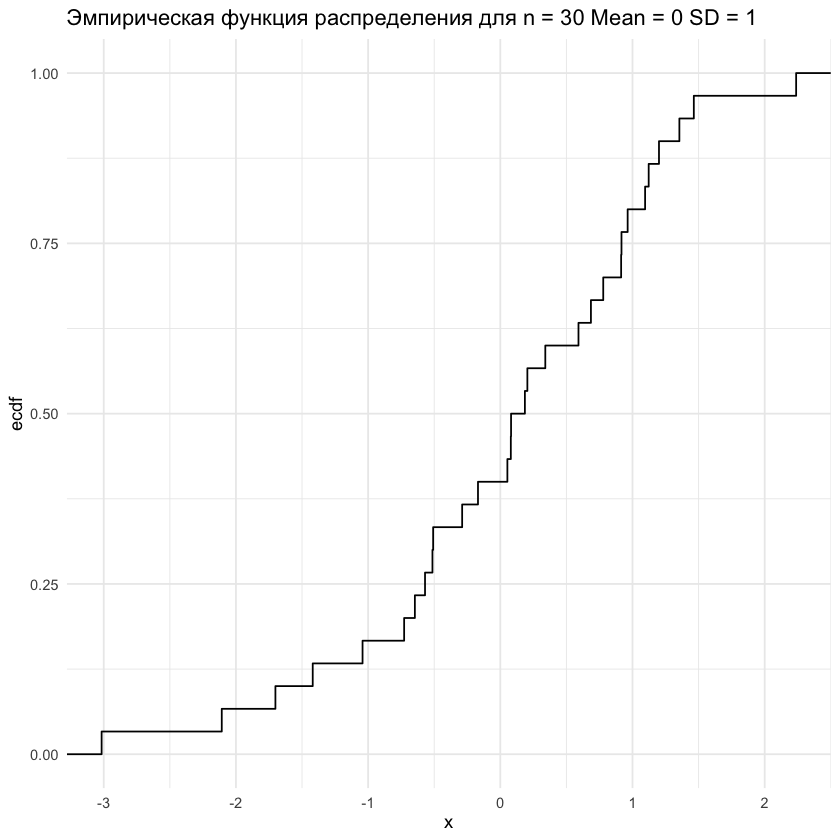

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


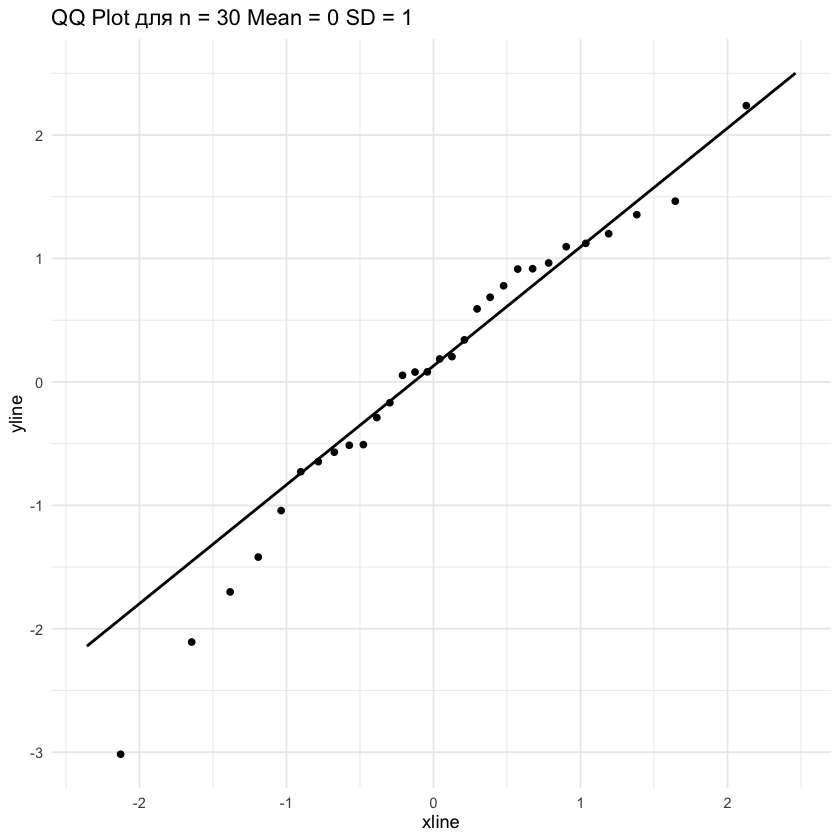

Результаты тестов для малой выборки (n = 30):
$`Критерий Колмогорова-Смирнова`
[1] 0.7101903

$`Критерий Шапиро-Уилка`
[1] 0.4648973

$`Критерий Андерсона-Дарлинга`
[1] 0.439169

$`Критерий Крамера-фон Мизеса`
[1] 0.4669305

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 0.6139521

$`Критерий Колмогорова в модификации Шапиро-Франсия`
[1] 0.3103761



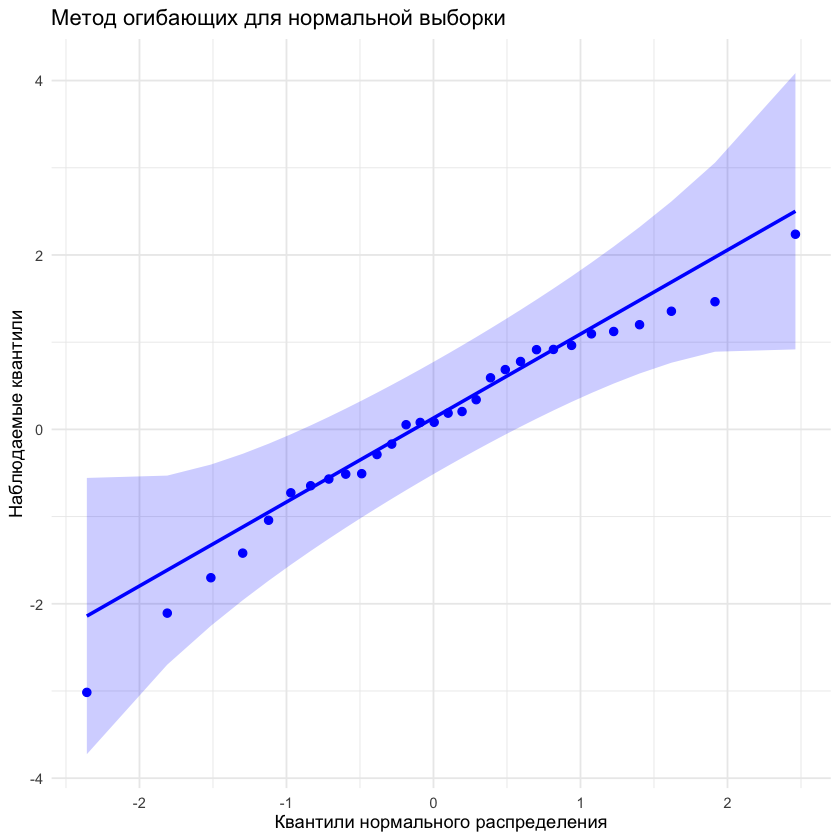

In [116]:
theme_set(theme_minimal())

results_small <- analyze_normality(mean = 0, sd = 1, n_samples = 30)
print(results_small$ecdf_plot)
print(results_small$qq_plot)
env(results_small$sample)
 
cat("Результаты тестов для малой выборки (n = 30):\n")
print(results_small$tests_results)

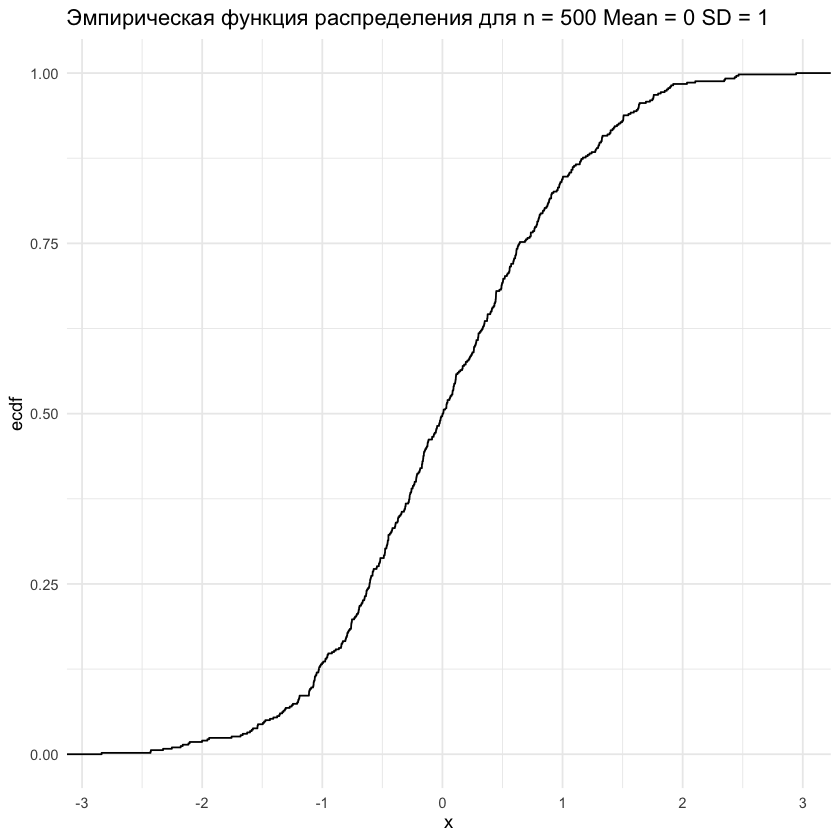

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


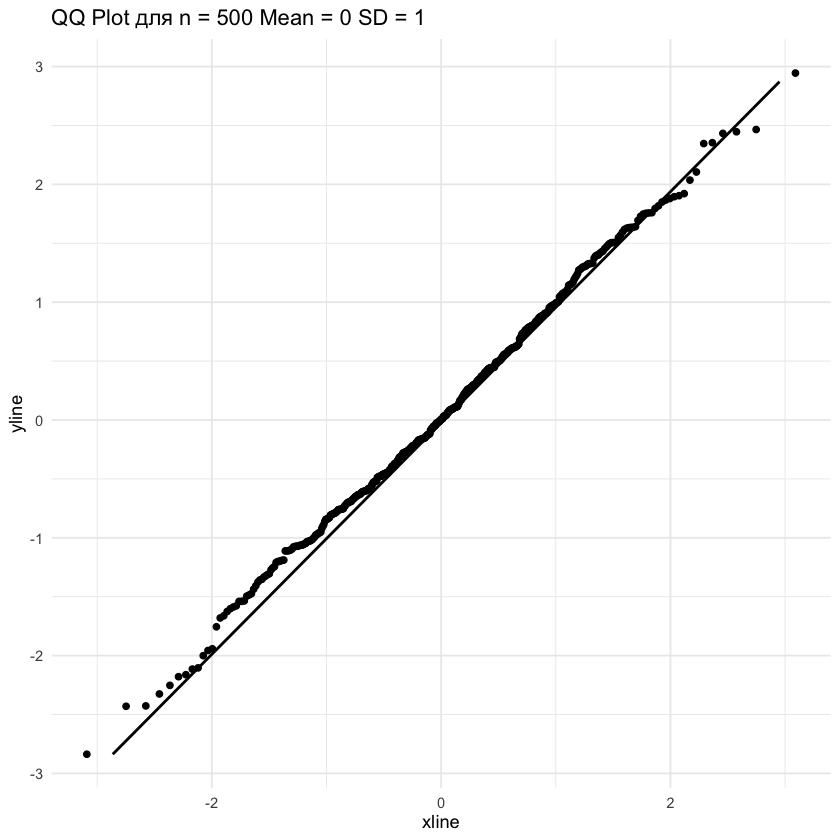

Результаты тестов для умеренной выборки (n = 500):
$`Критерий Колмогорова-Смирнова`
[1] 0.2154096

$`Критерий Шапиро-Уилка`
[1] 0.7017188

$`Критерий Андерсона-Дарлинга`
[1] 0.3763144

$`Критерий Крамера-фон Мизеса`
[1] 0.365541

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 0.3869371

$`Критерий Колмогорова в модификации Шапиро-Франсия`
[1] 0.6827338



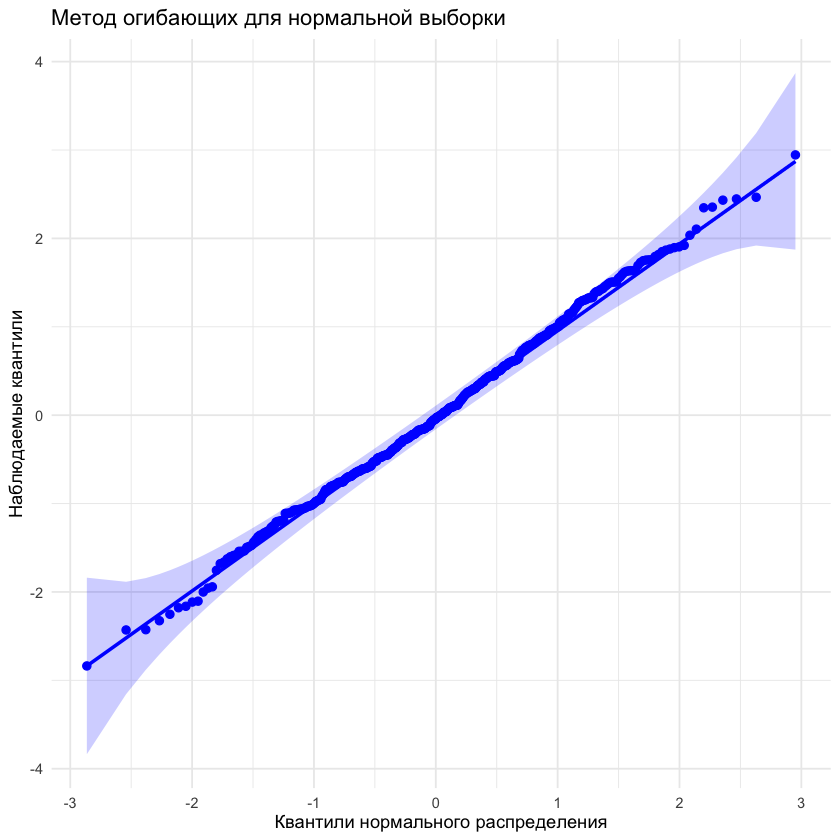

In [117]:
results_moderate <- analyze_normality(mean = 0, sd = 1, n_samples = 500)
print(results_moderate$ecdf_plot)
print(results_moderate$qq_plot)
env(results_moderate$sample)
 
cat("Результаты тестов для умеренной выборки (n = 500):\n")
print(results_moderate$tests_results)

## Анализ данных с использованием метода огибающих

In [120]:
analyze_normality <- function(data_column, column_name = "переменная", confidence = 0.99) {
  # Эмпирическая функция распределения (ECDF)
  ecdf_plot <- ggplot(data.frame(x = data_column), aes(x = x)) +
    stat_ecdf(geom = "step") +
    labs(
      title = paste("Эмпирическая функция распределения для столбца", column_name),
      x = column_name,
      y = "F(x)"
    )

  # Q-Q plot с огибающей (аналог env для правильного отображения, с обработкой ties)
  df_qq <- data.frame(sample = data_column)
  qq_plot <- ggplot(data = df_qq, mapping = aes(sample = sample)) +
    stat_qq_band(bandType = "pointwise", conf = confidence, fill = "blue", alpha = 0.2) +  # Envelope с обработкой ties
    stat_qq_line(color = "blue", size = 1) +  # Q-Q Line
    stat_qq_point(color = "blue", size = 0.5, shape = 19) +  # Data points с jitter для ties и уменьшенным размером
    labs(
      x = "Квантили нормального распределения",
      y = "Наблюдаемые квантили",
      title = paste("Q-Q Plot с огибающей для столбца", column_name)
    ) +
    theme_minimal() +
    theme(legend.position = "top") +
    guides(
      fill = guide_legend(title = paste0(round(confidence * 100), "% Envelope"), override.aes = list(alpha = 0.2, color = NA)),
      color = guide_legend(title = NULL, override.aes = list(shape = NA, linetype = NA))
    ) +
    scale_fill_manual(values = "blue") +
    scale_color_manual(values = c("Q-Q Line" = "blue", "Data" = "blue"), labels = c("Data", "Q-Q Line"))

  # Результаты тестов
  tests_results <- list()

  ks_test <- ks.test(data_column, "pnorm", mean = mean(data_column), sd = sd(data_column))
  tests_results$`Критерий Колмогорова-Смирнова` <- ks_test$p.value

  shapiro_test <- shapiro.test(data_column)
  tests_results$`Критерий Шапиро-Уилка` <- shapiro_test$p.value

  ad_test <- ad.test(data_column)
  tests_results$`Критерий Андерсона-Дарлинга` <- ad_test$p.value

  cvm_test <- cvm.test(data_column)
  tests_results$`Критерий Крамера-фон Мизеса` <- cvm_test$p.value

  lillie_test <- lillie.test(data_column)
  tests_results$`Критерий Колмогорова в модификации Лиллиефорса` <- lillie_test$p.value

  shapiro_francia_test <- sf.test(data_column)
  tests_results$`Критерий Шапиро-Франция` <- shapiro_francia_test$p.value

  return(list(
    ecdf_plot = ecdf_plot,
    qq_plot = qq_plot,
    tests_results = tests_results
  ))
}

Warning message in ks.test.default(data_column, "pnorm", mean = mean(data_column), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in cvm.test(data_column):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


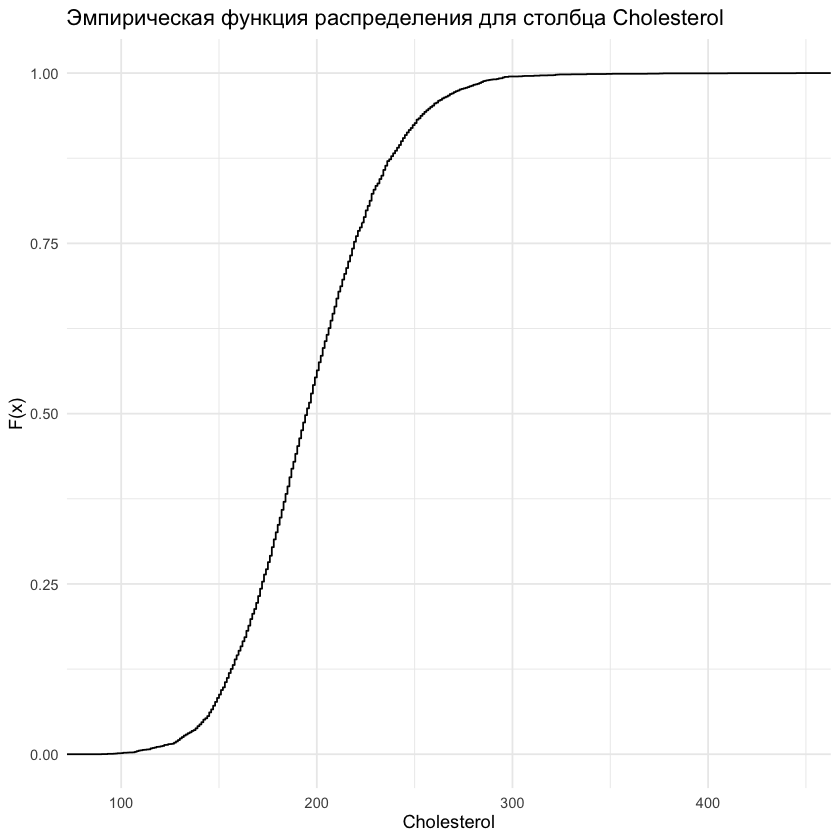

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


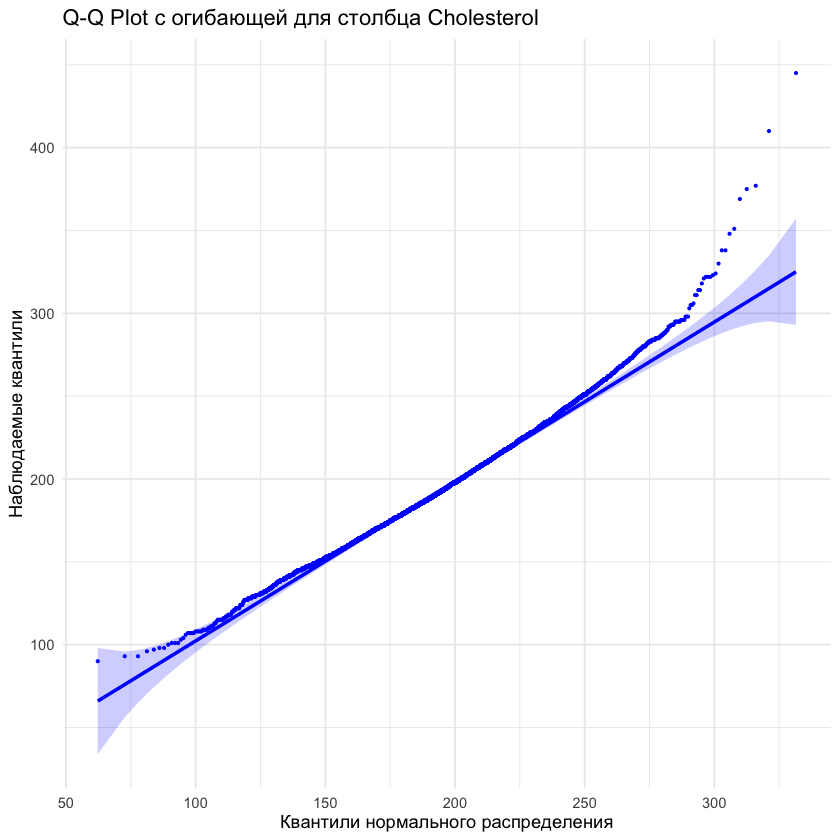

Результаты тестов для столбца Cholesterol:
$`Критерий Колмогорова-Смирнова`
[1] 0.000252173

$`Критерий Шапиро-Уилка`
[1] 7.537577e-20

$`Критерий Андерсона-Дарлинга`
[1] 2.535717e-17

$`Критерий Крамера-фон Мизеса`
[1] 7.37e-10

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 4.891527e-11

$`Критерий Шапиро-Франция`
[1] 1.457744e-19



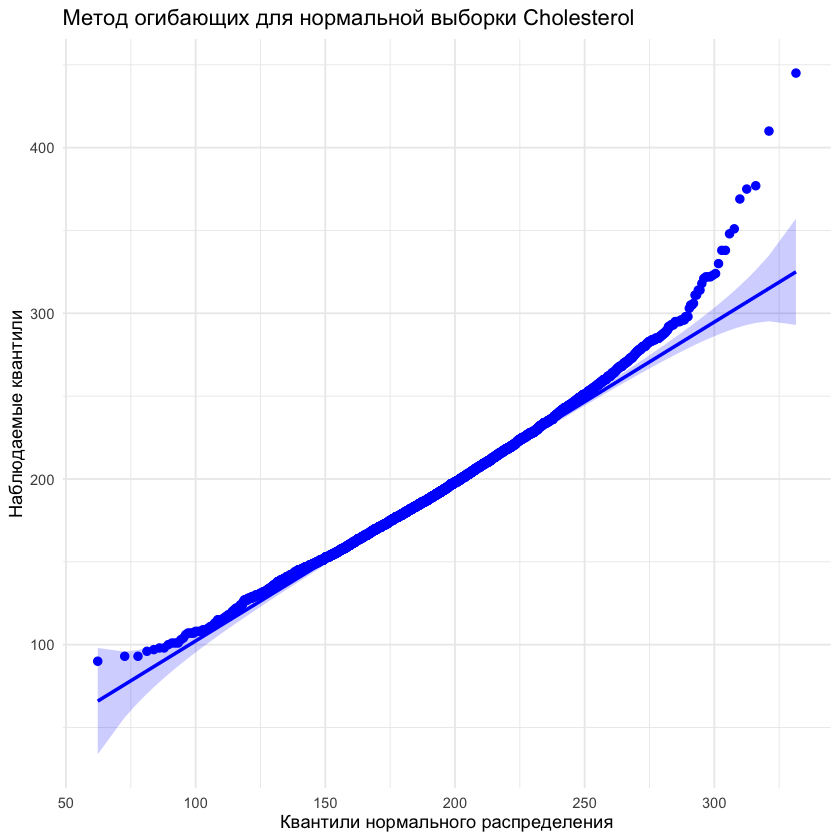

In [122]:
theme_set(theme_minimal())

cholesterol_data <- df$Cholesterol
set.seed(123)
cholesterol_data <- sample(cholesterol_data, 5000)

results_cholesterol <- analyze_normality(cholesterol_data, "Cholesterol")
print(results_cholesterol$ecdf_plot)
print(results_cholesterol$qq_plot)

# Вместо print(results_cholesterol$qq_plot) используйте env для огибающей
env(cholesterol_data, data_name = "Cholesterol")

cat("Результаты тестов для столбца Cholesterol:\n")
print(results_cholesterol$tests_results)

Warning message in ks.test.default(data_column, "pnorm", mean = mean(data_column), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


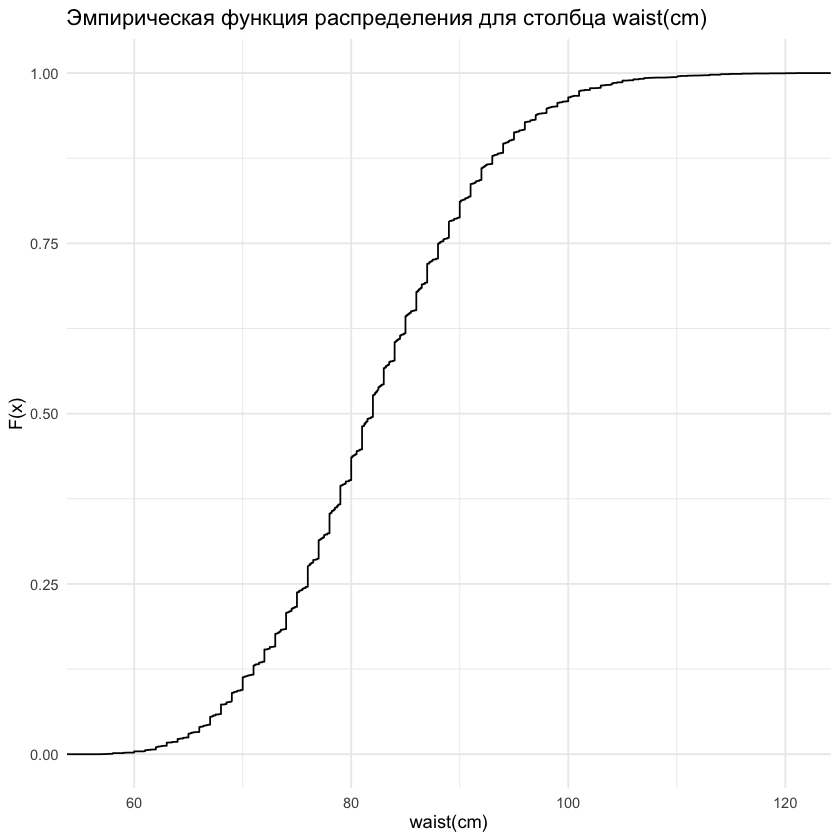

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


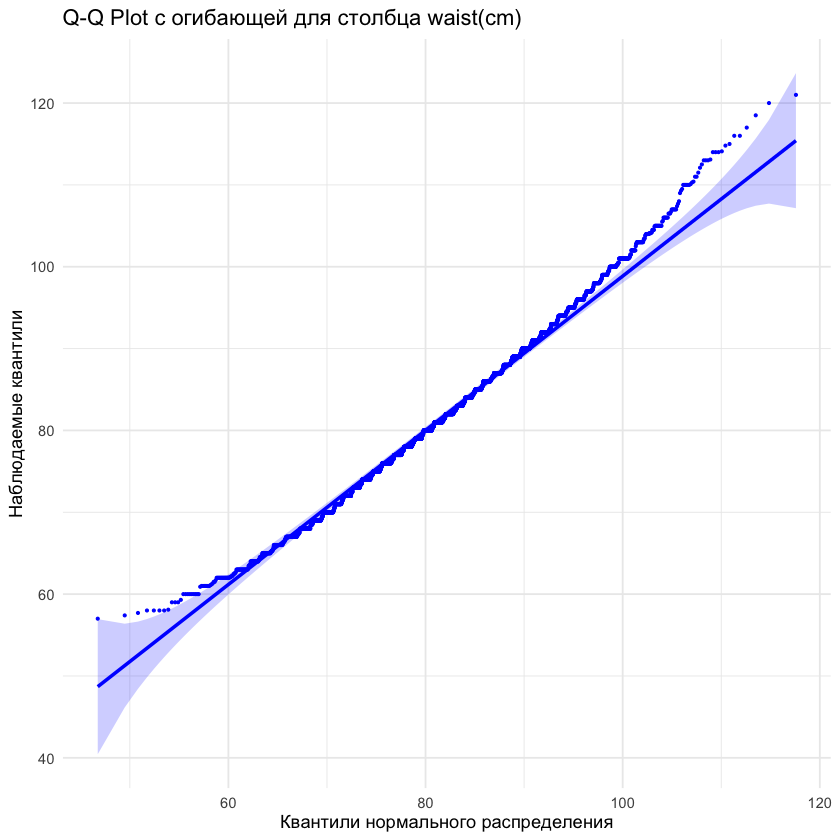

Результаты тестов для столбца waist(cm):
$`Критерий Колмогорова-Смирнова`
[1] 2.234516e-05

$`Критерий Шапиро-Уилка`
[1] 1.03507e-12

$`Критерий Андерсона-Дарлинга`
[1] 1.373616e-10

$`Критерий Крамера-фон Мизеса`
[1] 1.093154e-07

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 3.333958e-14

$`Критерий Шапиро-Франция`
[1] 1.94432e-12



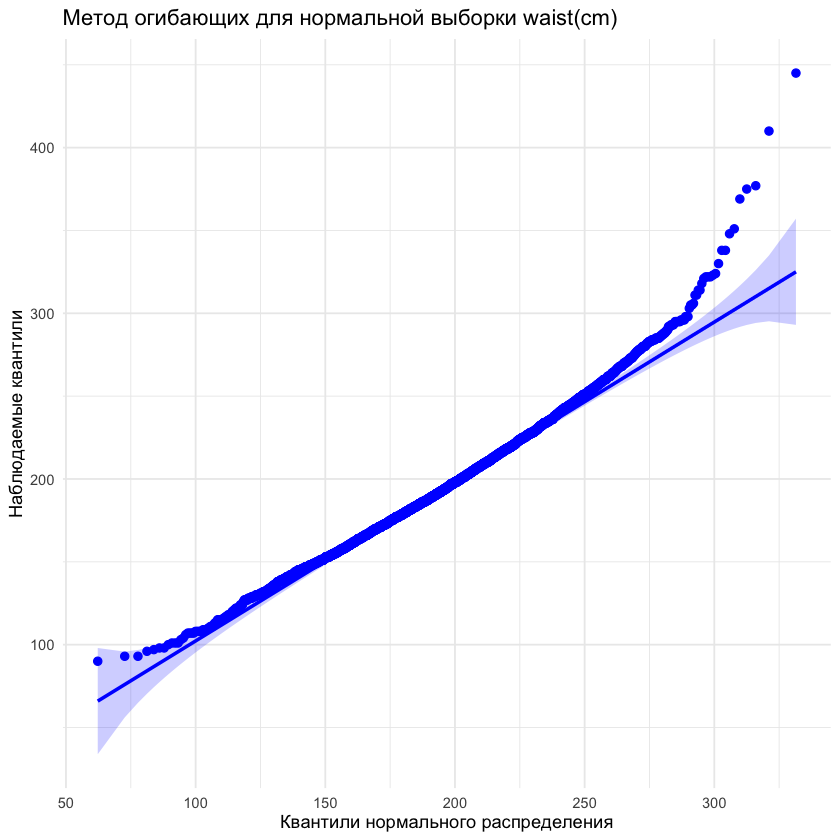

In [123]:
theme_set(theme_minimal())

waist_data <- df$`waist(cm)`
set.seed(123)  # Set seed for reproducibility
waist_data <- sample(waist_data, 5000)
  
results_waist <- analyze_normality(waist_data, "waist(cm)")

print(results_waist$ecdf_plot)
print(results_waist$qq_plot)
env(cholesterol_data, data_name = "waist(cm)")

cat("Результаты тестов для столбца waist(cm):\n")
print(results_waist$tests_results)

Warning message in ks.test.default(data_column, "pnorm", mean = mean(data_column), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in cvm.test(data_column):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


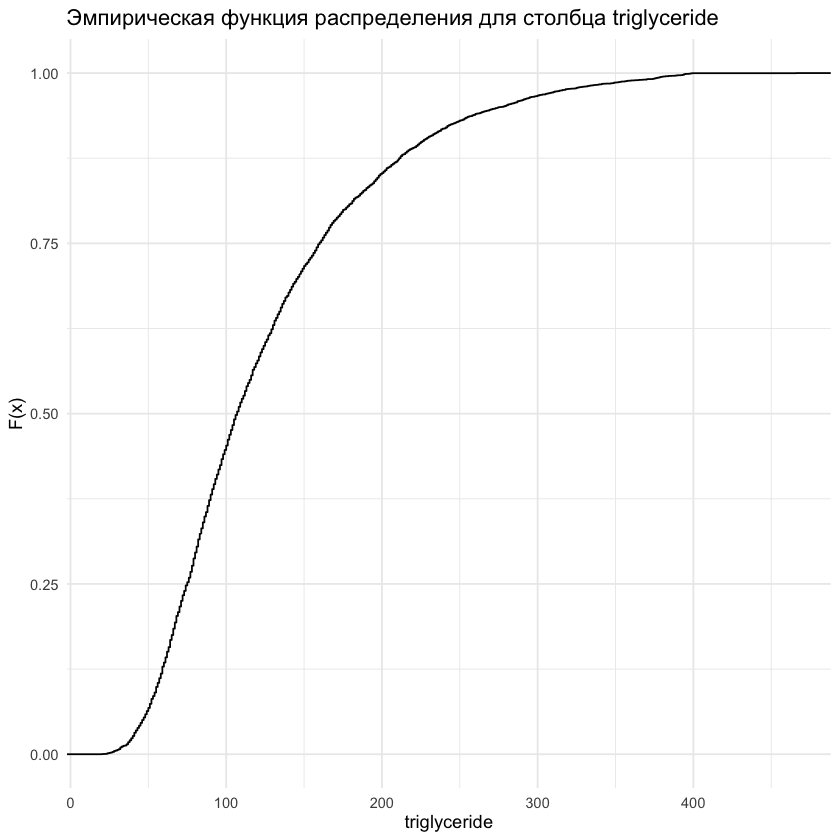

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


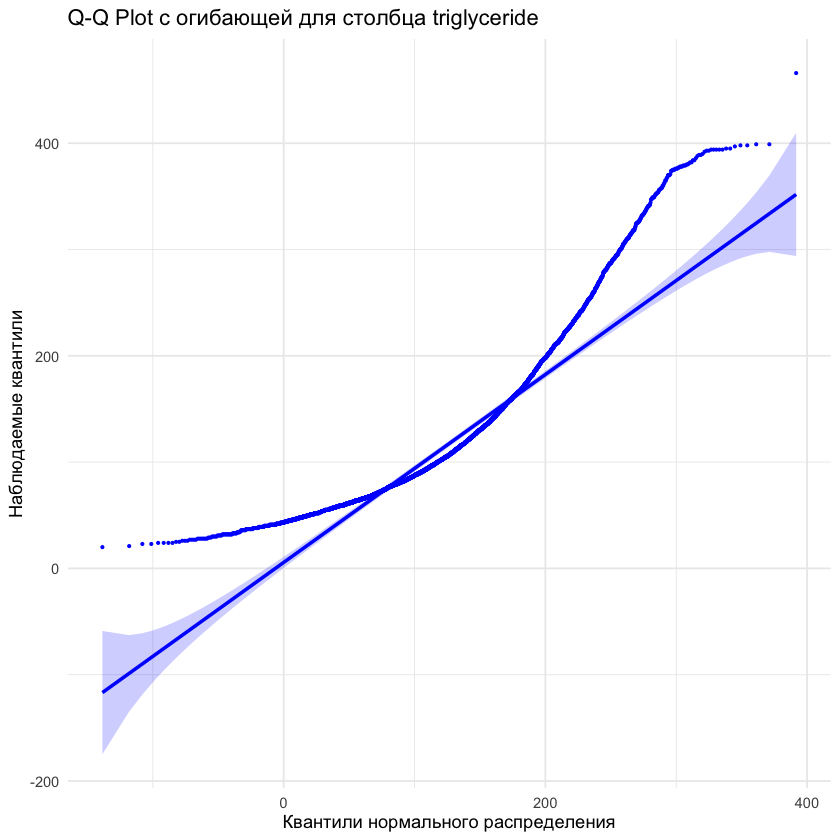

Результаты тестов для столбца triglyceride:
$`Критерий Колмогорова-Смирнова`
[1] 1.29569e-60

$`Критерий Шапиро-Уилка`
[1] 1.804337e-50

$`Критерий Андерсона-Дарлинга`
[1] 3.7e-24

$`Критерий Крамера-фон Мизеса`
[1] 7.37e-10

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 9.425718e-191

$`Критерий Шапиро-Франция`
[1] 2.290364e-48



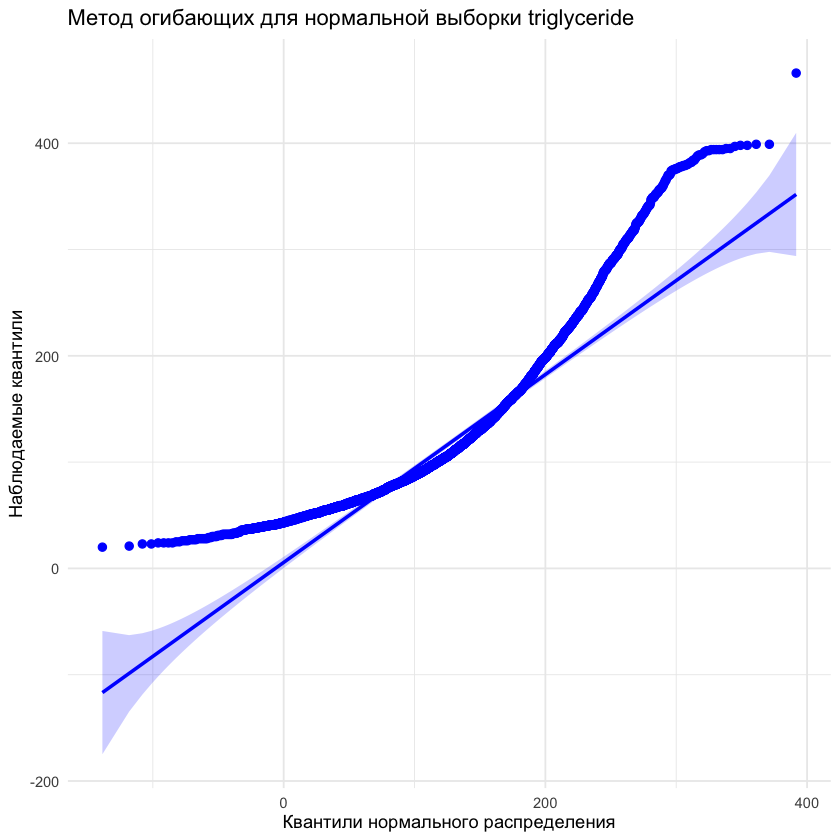

In [128]:
theme_set(theme_minimal())

triglyceride_data <- df$triglyceride
set.seed(123)  # Set seed for reproducibility
triglyceride_data <- sample(triglyceride_data, 5000)
  
results_triglyceride <- analyze_normality(triglyceride_data, "triglyceride")

print(results_triglyceride$ecdf_plot)
print(results_triglyceride$qq_plot)
env(triglyceride_data, data_name = "triglyceride")

cat("Результаты тестов для столбца triglyceride:\n")
print(results_triglyceride$tests_results)

# Второй этап

In [131]:
# Уровни значимости
alphas <- c(0.1, 0.05, 0.01)

# Столбец-фактор
group_col <- "smoking"

# 1. Уникальные значения в group_col, без NA, отсортированные
groups <- sort(unique(df[[group_col]][!is.na(df[[group_col]])]))

# 2. Проверка: ровно 2 группы
if (length(groups) != 2) {
  stop(sprintf("Ожидались 2 группы по '%s', а получено: %s", 
               group_col, paste(groups, collapse = ", ")))
}

# 3. Назначаем группы
g0_val <- groups[1]  # например, 0 — некурящий
g1_val <- groups[2]  # например, 1 — курящий

# 4. Разделяем данные
g0 <- df[df[[group_col]] == g0_val & !is.na(df[[group_col]]), ]
g1 <- df[df[[group_col]] == g1_val & !is.na(df[[group_col]]), ]

# 5. Числовые столбцы, исключая group_col
all_numeric_cols <- names(df)[sapply(df, is.numeric)]
num_cols <- setdiff(all_numeric_cols, group_col)

# 6. Выбираем столбец
col <- "Cholesterol"

# 7. Данные по группам без NA
x <- g0[[col]][!is.na(g0[[col]])]  # некурящие
y <- g1[[col]][!is.na(g1[[col]])]  # курящие

### Стьюдент

#### Так как Стьюдент работакет только на околонормальных распределениях, рассмотрим этот тест только для Cholesterol

In [135]:
# --- 1. Двусторонний t-критерий (H1: mean(smokers) ≠ mean(non-smokers)) ---
t_two_res <- t.test(y, x, var.equal = FALSE)  # x = non-smokers, y = smokers
t_two   <- t_two_res$statistic
p_two   <- t_two_res$p.value

# --- 2. Односторонний: H1: mean(smokers) > mean(non-smokers) ---
t_greater_res <- t.test(y, x, var.equal = FALSE, alternative = "greater")
t_greater <- t_greater_res$statistic
p_greater <- t_greater_res$p.value

# --- 3. Односторонний: H1: mean(smokers) < mean(non-smokers) ---
t_less_res <- t.test(y, x, var.equal = FALSE, alternative = "less")
t_less <- t_less_res$statistic
p_less <- t_less_res$p.value

# --- 4. Проверка гипотез для разных alpha ---
for (alpha in alphas) {
  crit <- 1 - alpha
  decision <- ifelse(p_two < alpha, "отвергаем", "не отвергаем")
  
  cat(sprintf("Доверительный уровень %.2f:\n", crit))
  cat(sprintf("  %s H0 (двусторонняя)\n", decision))
}

Доверительный уровень 0.90:
  отвергаем H0 (двусторонняя)
Доверительный уровень 0.95:
  отвергаем H0 (двусторонняя)
Доверительный уровень 0.99:
  отвергаем H0 (двусторонняя)


In [137]:
for (alpha in alphas) {
  crit <- 1 - alpha
  dec_g <- ifelse(p_greater < alpha, "отвергаем", "не отвергаем")
  dec_l <- ifelse(p_less < alpha, "не отвергаем", "отвергаем")  # обратите внимание: логика '<' перевернута
  
  cat(sprintf(" %.2f: %s H0 для H1 '>' ; %s H0 для H1 '<'\n", 
              crit, dec_g, dec_l))
}

 0.90: не отвергаем H0 для H1 '>' ; не отвергаем H0 для H1 '<'
 0.95: не отвергаем H0 для H1 '>' ; не отвергаем H0 для H1 '<'
 0.99: не отвергаем H0 для H1 '>' ; не отвергаем H0 для H1 '<'


### Оценка мощности для Стьюдента

In [140]:
# --- 1. Подготовка данных ---
chol_smokers    <- df[df$smoking == 1, ]$Cholesterol %>% na.omit()
chol_nonsmokers <- df[df$smoking == 0, ]$Cholesterol %>% na.omit()

n1 <- length(chol_smokers)
n0 <- length(chol_nonsmokers)

mean1 <- mean(chol_smokers)
mean0 <- mean(chol_nonsmokers)

var1 <- var(chol_smokers)   # в R var() по умолчанию ddof=1
var0 <- var(chol_nonsmokers)

pooled_sd <- sqrt((var1 + var0) / 2)
effect_size <- (mean1 - mean0) / pooled_sd

# --- 2. Вывод оценки эффекта ---
cat("Оценка эффекта для Cholesterol (курящие vs некурящие)\n")
cat(sprintf("n_smokers = %d, n_nonsmokers = %d\n", n1, n0))
cat(sprintf("mean_smokers = %.3f, mean_nonsmokers = %.3f\n", mean1, mean0))
cat(sprintf("Cohen's d = %.3f\n", effect_size))

# --- 3. Оценка мощности для текущих n ---
library(pwr)

alphas <- c(0.1, 0.05, 0.01)
cat("\nМощность t-критерия Стьюдента для фактических n (Cholesterol):\n")
for (alpha in alphas) {
  power <- pwr.t2n.test(
    n1 = n1,
    n2 = n0,
    d = abs(effect_size),
    sig.level = alpha
  )$power
  
  cat(sprintf("alpha = %.2f: power = %.3f\n", alpha, power))
}

# --- 4. Требуемый объём выборки для мощности 0.8 (равные группы) ---
target_power <- 0.8
cat(sprintf("\nТребуемый объём выборки для достижения мощности %.1f (равные группы):\n", target_power))
for (alpha in alphas) {
  n_required <- pwr.t.test(
    d = abs(effect_size),
    power = target_power,
    sig.level = alpha,
    type = "two.sample",
    alternative = "two.sided"
  )$n
  
  cat(sprintf("alpha = %.2f: n ≈ %.1f наблюдений в каждой группе\n", alpha, n_required))
}

Оценка эффекта для Cholesterol (курящие vs некурящие)
n_smokers = 14318, n_nonsmokers = 24666
mean_smokers = 195.572, mean_nonsmokers = 197.645
Cohen's d = -0.057

Мощность t-критерия Стьюдента для фактических n (Cholesterol):
alpha = 0.10: power = 1.000
alpha = 0.05: power = 1.000
alpha = 0.01: power = 0.998

Требуемый объём выборки для достижения мощности 0.8 (равные группы):
alpha = 0.10: n ≈ 3805.4 наблюдений в каждой группе
alpha = 0.05: n ≈ 4831.3 наблюдений в каждой группе
alpha = 0.01: n ≈ 7189.2 наблюдений в каждой группе


##### Оценённый размер эффекта различий в уровне холестерина между курящими и некурящими вляется пренебрежимо малым. При этом, благодаря очень большому объёму выборки, мощность t-критерия Стьюдента близка к 1 для всех рассматриваемых уровней значимости, то есть данные позволяют с высокой надёжностью утверждать, что статистически и тем более практически значимых различий уровней холестерина между группами в данной выборке нет.

### Критерий Манна-Уитни (ранговый)

In [144]:
info_nammwhitney <- function(df) {
  # --- 1. Исключаем 'smoking' ---
  cols_to_test <- setdiff(names(df), "smoking")
  results <- data.frame(
    Feature = character(),
    Mann_Whitney_two_sided = numeric(),
    Mann_Whitney_one_right = numeric(),
    Mann_Whitney_one_left = numeric(),
    stringsAsFactors = FALSE
  )
  
  # --- 2. Цикл по столбцам ---
  for (col in cols_to_test) {
    smokers    <- na.omit(df[df$smoking == 1, ][[col]])
    nonsmokers <- na.omit(df[df$smoking == 0, ][[col]])
    
    # Пропускаем, если нет данных в одной из групп
    if (length(smokers) == 0 || length(nonsmokers) == 0) {
      next
    }
    
    # --- Mann-Whitney U-тесты ---
    mw_two   <- wilcox.test(smokers, nonsmokers, alternative = "two.sided")$p.value
    mw_right <- wilcox.test(smokers, nonsmokers, alternative = "greater")$p.value
    mw_left  <- wilcox.test(smokers, nonsmokers, alternative = "less")$p.value
    
    # Добавляем строку
    results <- rbind(results, data.frame(
      Feature = col,
      Mann_Whitney_two_sided = mw_two,
      Mann_Whitney_one_right = mw_right,
      Mann_Whitney_one_left = mw_left
    ))
  }
  
  # --- 3. Форматирование p-значений ---
  format_p <- function(p) {
    ifelse(p < 1e-4, sprintf("%.2e", p), sprintf("%.4f", p))
  }
  
  display_df <- results
  display_df$Mann_Whitney_two_sided <- format_p(display_df$Mann_Whitney_two_sided)
  display_df$Mann_Whitney_one_right <- format_p(display_df$Mann_Whitney_one_right)
  display_df$Mann_Whitney_one_left  <- format_p(display_df$Mann_Whitney_one_left)
  
  # --- 4. Вывод таблицы ---
  cat(sprintf("%-15s %-20s %-20s %-20s\n", 
              "Feature", "two_sided", "one_right", "one_left"))
  cat(paste(rep("-", 80), collapse = ""), "\n")
  print(display_df, row.names = FALSE, right = FALSE)
  
  # --- 5. Проверка гипотез ---
  alphas <- c(0.1, 0.05, 0.01)
  
  for (alpha in alphas) {
    ci <- 1 - alpha
    cat(sprintf("\n=== Доверительный уровень %.2f ===\n", ci))
    
    for (i in seq_len(nrow(results))) {
      feat <- results$Feature[i]
      dec_two <- ifelse(results$Mann_Whitney_two_sided[i] < alpha, "отвергаем H0", "не отвергаем H0")
      dec_r   <- ifelse(results$Mann_Whitney_one_right[i] < alpha, "отвергаем H0", "не отвергаем H0")
      dec_l   <- ifelse(results$Mann_Whitney_one_left[i]  < alpha, "отвергаем H0", "не отвергаем H0")
      
      cat(sprintf("%s: двухсторонний — %s; правосторонний — %s; левосторонний — %s\n",
                  feat, dec_two, dec_r, dec_l))
    }
  }
}

# --- Запуск ---
info_nammwhitney(df)

Feature         two_sided            one_right            one_left            
-------------------------------------------------------------------------------- 
 Feature             Mann_Whitney_two_sided Mann_Whitney_one_right
 age                 2.10e-240              1.0000                
 height(cm)          0.00e+00               0.00e+00              
 weight(kg)          0.00e+00               0.00e+00              
 waist(cm)           0.00e+00               0.00e+00              
 eyesight(left)      5.53e-80               2.77e-80              
 eyesight(right)     1.98e-99               9.90e-100             
 hearing(left)       1.31e-05               1.0000                
 hearing(right)      0.0002                 0.9999                
 systolic            2.82e-48               1.41e-48              
 relaxation          3.48e-97               1.74e-97              
 fasting blood sugar 9.44e-91               4.72e-91              
 Cholesterol         9.78e-07      

#### Если брать всю выборку, то результаты не показывают нужного нам результата, так как при большой выборке тест Мэнна=Уитни не работают. Возьмем только первые 1000 наблюдений

In [147]:
info_nammwhitney(head(df, 1000))

Feature         two_sided            one_right            one_left            
-------------------------------------------------------------------------------- 
 Feature             Mann_Whitney_two_sided Mann_Whitney_one_right
 age                 0.0007                 0.9996                
 height(cm)          1.96e-31               9.80e-32              
 weight(kg)          8.19e-16               4.10e-16              
 waist(cm)           1.81e-07               9.03e-08              
 eyesight(left)      0.0003                 0.0001                
 eyesight(right)     4.60e-05               2.30e-05              
 hearing(left)       0.7718                 0.3859                
 hearing(right)      0.7164                 0.3582                
 systolic            0.0872                 0.0436                
 relaxation          0.1098                 0.0549                
 fasting blood sugar 0.0003                 0.0002                
 Cholesterol         0.2364        

#### Теперь видно, что многие признаки практически не влияют на то, курит ли человек, а точнее, не влияют: зрение, давление, холестерин, Gtp, наличие кариеса, протеин в моче и другие.

### Проверка гипотез об однородности дисперсий

### Фишер (требует нормальность)

In [152]:
# --- 1. Данные (уже должны быть определены) ---
# chol_smokers    <- ... (курящие)
# chol_nonsmokers <- ... (некурящие)

# --- 2. Дисперсии и степени свободы ---
var_smok    <- var(chol_smokers)      # в R var() = ddof=1
var_nonsmok <- var(chol_nonsmokers)

n1 <- length(chol_smokers)
n0 <- length(chol_nonsmokers)

# --- 3. Вычисляем F-статистику (всегда большая дисперсия в числителе) ---
if (var_smok >= var_nonsmok) {
  F   <- var_smok / var_nonsmok
  dfn <- n1 - 1   # числитель
  dfd <- n0 - 1   # знаменатель
} else {
  F   <- var_nonsmok / var_smok
  dfn <- n0 - 1
  dfd <- n1 - 1
}

# --- 4. Двустороннее p-значение ---
p_value <- 2 * min(
  pf(F, dfn, dfd),           # P(F <= наблюдаемое)
  1 - pf(F, dfn, dfd)        # P(F >= наблюдаемое)
)

cat(sprintf("p-value по Фишеру = %.4g\n", p_value))

# --- 5. Проверка гипотез ---
alphas <- c(0.1, 0.05, 0.01)

for (alpha in alphas) {
  ci <- 1 - alpha
  decision <- ifelse(p_value < alpha, "отвергаем H0", "не отвергаем H0")
  cat(sprintf("При доверительном уровне %.2f: %s\n", ci, decision))
}

p-value по Фишеру = 0.4189
При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


### Бартлетт (требует нормальность)

In [155]:
# --- 1. Тест Бартлетта (проверка равенства дисперсий) ---
bartlett_res <- bartlett.test(list(chol_smokers, chol_nonsmokers))

stat_bartlett <- bartlett_res$statistic
p_bartlett    <- bartlett_res$p.value

# --- 2. Вывод статистики и p-значения ---
cat(sprintf("Статистика по Бартлетту: %.4f\n", stat_bartlett))
cat(sprintf("p-value по Бартлетту: %.4g\n", p_bartlett))

# --- 3. Проверка гипотез для разных alpha ---
alphas <- c(0.1, 0.05, 0.01)

for (alpha in alphas) {
  ci <- 1 - alpha
  decision <- ifelse(p_bartlett < alpha, "отвергаем H0", "не отвергаем H0")
  cat(sprintf("При доверительном уровне %.2f: %s\n", ci, decision))
}

Статистика по Бартлетту: 0.6513
p-value по Бартлетту: 0.4197
При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


### Левен (менее чувстителен к нормальности)

In [158]:
all_leven <- function(df) {
  features <- c("Cholesterol", "triglyceride", "fasting blood sugar", "waist(cm)")
  alphas <- c(0.1, 0.05, 0.01)
  
  if (!require("car")) install.packages("car")
  library(car)
  
  for (col in features) {
    if (!col %in% names(df)) next
    
    group1 <- na.omit(df[df$smoking == 1, ][[col]])
    group0 <- na.omit(df[df$smoking == 0, ][[col]])
    
    if (length(group1) == 0 || length(group0) == 0) {
      cat(sprintf("%s: недостаточно данных.\n\n", col))
      next
    }
    
    # Векторный интерфейс — center = mean работает!
    lev_res <- leveneTest(c(group1, group0), 
                          group = c(rep("smokers", length(group1)), 
                                    rep("nonsmokers", length(group0))), 
                          center = mean)
    
    stat_lev <- lev_res[1, "F value"]
    p_lev    <- lev_res[1, "Pr(>F)"]
    
    cat(sprintf("%s\n", col))
    cat(sprintf("Статистика по Левену: %.4f, p-value по Левену: %.4g\n\n", stat_lev, p_lev))
    
    for (alpha in alphas) {
      ci <- 1 - alpha
      decision <- ifelse(p_lev < alpha, "отвергаем H0", "не отвергаем H0")
      cat(sprintf("При доверительном уровне %.2f: %s\n", ci, decision))
    }
    cat("\n\n")
  }
}

all_leven(df)

Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


Cholesterol
Статистика по Левену: 2.0489, p-value по Левену: 0.1523

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


triglyceride
Статистика по Левену: 1097.3833, p-value по Левену: 2.433e-237

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


fasting blood sugar
Статистика по Левену: 311.4542, p-value по Левену: 1.963e-69

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


waist(cm)
Статистика по Левену: 81.1966, p-value по Левену: 2.134e-19

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0




In [160]:
all_leven(head(df, 1000))

Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


Cholesterol
Статистика по Левену: 0.7427, p-value по Левену: 0.389

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


triglyceride
Статистика по Левену: 26.2473, p-value по Левену: 3.605e-07

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


fasting blood sugar
Статистика по Левену: 6.5762, p-value по Левену: 0.01048

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: не отвергаем H0




Warning message in leveneTest.default(c(group1, group0), group = c(rep("smokers", :
“c(rep("smokers", length(group1)), rep("nonsmokers", length(group0))) coerced to factor.”


waist(cm)
Статистика по Левену: 12.5877, p-value по Левену: 0.0004064

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0




### Флигнер-Килин (самый универсальный)

In [163]:
print("Тест Флигнера–Килина для всех числовых признаков\n")

all_fligner <- function(df) {
  # --- 1. Выбираем все числовые столбцы, исключая 'smoking' ---
  num_cols <- names(df)[sapply(df, is.numeric)]
  cols_to_test <- setdiff(num_cols, "smoking")
  
  # --- 2. Уровни значимости ---
  alphas <- c(0.1, 0.05, 0.01)
  
  # --- 3. Цикл по признакам ---
  for (col in cols_to_test) {
    if (!col %in% names(df)) next
    
    # Данные по группам
    group1 <- na.omit(df[df$smoking == 1, ][[col]])  # курящие
    group0 <- na.omit(df[df$smoking == 0, ][[col]])  # некурящие
    
    # Пропускаем, если нет данных
    if (length(group1) == 0 || length(group0) == 0) {
      cat(sprintf("%s: недостаточно данных в одной из групп.\n\n", col))
      next
    }
    
    # --- Тест Флигнера–Килина ---
    fligner_res <- fligner.test(c(group1, group0), 
                                g = c(rep(1, length(group1)), 
                                      rep(0, length(group0))))
    
    stat_fli <- fligner_res$statistic
    p_fli    <- fligner_res$p.value
    
    # --- Вывод ---
    cat(sprintf("%s: статистика = %.4f, p-value = %.4g\n\n", col, stat_fli, p_fli))
    
    for (alpha in alphas) {
      ci <- 1 - alpha
      decision <- ifelse(p_fli < alpha, "отвергаем H0", "не отвергаем H0")
      cat(sprintf("При доверительном уровне %.2f: %s\n", ci, decision))
    }
    cat("\n\n")
  }
}

# --- Запуск ---
all_fligner(df)

[1] "Тест Флигнера–Килина для всех числовых признаков\n"
age: статистика = 155.1283, p-value = 1.313e-35

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


height(cm): статистика = 1909.9945, p-value = 0

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


weight(kg): статистика = 26.8302, p-value = 2.221e-07

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


waist(cm): статистика = 79.3307, p-value = 5.254e-19

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


eyesight(left): статистика = 0.1731, p-value = 0.6773

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


ey

In [164]:
all_fligner(head(df, 1000))

age: статистика = 1.4438, p-value = 0.2295

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


height(cm): статистика = 68.8479, p-value = 1.064e-16

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


weight(kg): статистика = 1.5983, p-value = 0.2061

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


waist(cm): статистика = 13.0101, p-value = 0.0003098

При доверительном уровне 0.90: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0


eyesight(left): статистика = 0.2971, p-value = 0.5857

При доверительном уровне 0.90: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


eyesight(right): статистика = 0.2167, p-valu

## Корреляционные взаимосвязи

In [167]:
continual <- c('waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 
               'Cholesterol', 'triglyceride', 'HDL', 'LDL', 
               'hemoglobin', 'AST', 'ALT', 'Gtp')

### Пирсон (требует нормальность и отсутствие выбросов)

#### В моем случае только холестирин нормален, поэтому рассмотрю взаимрсвязь только между ним и waist (самое "околонормальное")

In [170]:
chol_waist <- function(df) {
  # --- 1. Проверяем наличие столбцов ---
  if (!"Cholesterol" %in% names(df) || !"waist(cm)" %in% names(df)) {
    stop("В df отсутствуют столбцы 'Cholesterol' или 'waist(cm)'")
  }
  
  # --- 2. Удаляем строки с NA в обоих признаках ---
  data_clean <- df[!is.na(df$Cholesterol) & !is.na(df$`waist(cm)`), ]
  
  if (nrow(data_clean) < 2) {
    stop("Недостаточно данных после удаления NA")
  }
  
  # --- 3. Корреляция Пирсона ---
  cor_res <- cor.test(data_clean$Cholesterol, data_clean$`waist(cm)`, method = "pearson")
  
  r        <- cor_res$estimate
  p_value  <- cor_res$p.value
  
  # --- 4. Вывод ---
  cat("Корреляция Пирсона между Cholesterol и waist(cm)\n")
  cat(sprintf("Коэффициент корреляции = %.4f\n", r))
  cat(sprintf("p-value = %.4g\n", p_value))
  
  # --- 5. Интерпретация силы и направления ---
  abs_r <- abs(r)
  if (abs_r < 0.3) {
    strength <- "слабая"
  } else if (abs_r < 0.7) {
    strength <- "умеренная"
  } else {
    strength <- "сильная"
  }
  
  direction <- ifelse(r > 0, "прямая", "обратная")
  
  cat(sprintf("Связь %s, %s.\n", strength, direction))
}

# --- Запуск ---
chol_waist(df)

Корреляция Пирсона между Cholesterol и waist(cm)
Коэффициент корреляции = 0.0649
p-value = 1.046e-37
Связь слабая, прямая.


In [172]:
chol_waist(head(df, 1000))

Корреляция Пирсона между Cholesterol и waist(cm)
Коэффициент корреляции = 0.1071
p-value = 0.0006902
Связь слабая, прямая.


### Спирмен (не зависит от нормальности и на него мало влияют выбросы

#### Так как данный коэффицент особо ни к чему не привязан, то, чтобы не рассматривать взаимосвязь всех между всеми, рассмотрю только связь waist(cm) с остальными признаками. Ьуду сразу проверять на урезанной выборке, так как на полгных данных результаты абсолютно некорректны

In [176]:
cat("Коэффициент Спирмена между waist(cm) и остальными числовыми признаками\n\n")

all_spirmen <- function(df) {
  # --- 1. Список признаков, исключая 'waist(cm)' ---
  num_cols <- setdiff(continual, "waist(cm)")
  
  # --- 2. Проверка наличия 'waist(cm)' ---
  if (!"waist(cm)" %in% names(df)) {
    stop("Столбец 'waist(cm)' не найден в df")
  }
  
  # --- 3. Цикл по признакам ---
  for (col in num_cols) {
    if (!col %in% names(df)) {
      cat(sprintf("%s: столбец не найден — пропущен\n\n", col))
      next
    }
    
    # Удаляем строки, где есть NA в waist или текущем признаке
    data_clean <- df[!is.na(df$`waist(cm)`) & !is.na(df[[col]]), ]
    
    if (nrow(data_clean) < 2) {
      cat(sprintf("%s: недостаточно данных после удаления NA\n\n", col))
      next
    }
    
    # --- Корреляция Спирмена ---
    spear_res <- cor.test(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman")
    
    r_spearman <- spear_res$estimate
    p_value    <- spear_res$p.value
    
    # --- Сила связи ---
    abs_r <- abs(r_spearman)
    strength <- ifelse(abs_r < 0.3, "слабая",
                       ifelse(abs_r < 0.7, "умеренная", "сильная"))
    
    # --- Направление ---
    direction <- ifelse(r_spearman > 0, "прямая", "обратная")
    
    # --- Вывод ---
    cat(sprintf("%s: коэффициент Спирмена = %.4f, p-value = %.4g\n", col, r_spearman, p_value))
    cat(sprintf("Связь %s, %s\n\n", strength, direction))
  }
}

# --- Запуск ---
all_spirmen(df)

Коэффициент Спирмена между waist(cm) и остальными числовыми признаками



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


systolic: коэффициент Спирмена = 0.3220, p-value = 0
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


relaxation: коэффициент Спирмена = 0.2897, p-value = 0
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


fasting blood sugar: коэффициент Спирмена = 0.2606, p-value = 0
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


Cholesterol: коэффициент Спирмена = 0.0749, p-value = 1.372e-49
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


triglyceride: коэффициент Спирмена = 0.3984, p-value = 0
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


HDL: коэффициент Спирмена = -0.3968, p-value = 0
Связь умеренная, обратная



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


LDL: коэффициент Спирмена = 0.0998, p-value = 7.308e-87
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


hemoglobin: коэффициент Спирмена = 0.3996, p-value = 0
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


AST: коэффициент Спирмена = 0.2499, p-value = 0
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


ALT: коэффициент Спирмена = 0.4591, p-value = 0
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


Gtp: коэффициент Спирмена = 0.4676, p-value = 0
Связь умеренная, прямая



In [178]:
all_spirmen(head(df, 1000))

Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


systolic: коэффициент Спирмена = 0.3669, p-value = 3.227e-33
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


relaxation: коэффициент Спирмена = 0.2869, p-value = 2.139e-20
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


fasting blood sugar: коэффициент Спирмена = 0.2741, p-value = 1.08e-18
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


Cholesterol: коэффициент Спирмена = 0.1199, p-value = 0.000144
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


triglyceride: коэффициент Спирмена = 0.4050, p-value = 9.444e-41
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


HDL: коэффициент Спирмена = -0.4169, p-value = 2.514e-43
Связь умеренная, обратная



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


LDL: коэффициент Спирмена = 0.1519, p-value = 1.406e-06
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


hemoglobin: коэффициент Спирмена = 0.3676, p-value = 2.394e-33
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


AST: коэффициент Спирмена = 0.2211, p-value = 1.538e-12
Связь слабая, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


ALT: коэффициент Спирмена = 0.4218, p-value = 2.075e-44
Связь умеренная, прямая



Warning message in cor.test.default(data_clean$`waist(cm)`, data_clean[[col]], method = "spearman"):
“Cannot compute exact p-value with ties”


Gtp: коэффициент Спирмена = 0.4560, p-value = 1.643e-52
Связь умеренная, прямая



### Кендалл (тоже особо ничего не ограничен)

#### Для сравнения также рассмотрю только waist(cm) со всеми остальными признаками

In [182]:
cat("Коэффициент Кендалла между waist(cm) и остальными числовыми признаками\n\n")

all_kendall <- function(df) {
  # --- 1. Список признаков, исключая 'waist(cm)' ---
  num_cols <- setdiff(continual, "waist(cm)")
  
  # --- 2. Проверка наличия 'waist(cm)' ---
  if (!"waist(cm)" %in% names(df)) {
    stop("Столбец 'waist(cm)' не найден в df")
  }
  
  # --- 3. Цикл по признакам ---
  for (col in num_cols) {
    if (!col %in% names(df)) {
      cat(sprintf("%s: столбец не найден — пропущен\n\n", col))
      next
    }
    
    # Удаляем строки с NA в обоих признаках
    data_clean <- df[!is.na(df$`waist(cm)`) & !is.na(df[[col]]), ]
    
    if (nrow(data_clean) < 2) {
      cat(sprintf("%s: недостаточно данных после удаления NA\n\n", col))
      next
    }
    
    # --- Корреляция Кендалла ---
    kendall_res <- cor.test(data_clean$`waist(cm)`, data_clean[[col]], method = "kendall")
    
    r_kendall  <- kendall_res$estimate
    p_value    <- kendall_res$p.value
    
    # --- Сила связи ---
    abs_r <- abs(r_kendall)
    strength <- ifelse(abs_r < 0.3, "слабая",
                       ifelse(abs_r < 0.7, "умеренная", "сильная"))
    
    # --- Направление ---
    direction <- ifelse(r_kendall > 0, "прямая", "обратная")
    
    # --- Вывод ---
    cat(sprintf("%s: коэффициент Кендалла = %.4f, p-value = %.4g\n", col, r_kendall, p_value))
    cat(sprintf("Связь %s, %s\n\n", strength, direction))
  }
}

# --- Запуск ---
all_kendall(df)

Коэффициент Кендалла между waist(cm) и остальными числовыми признаками

systolic: коэффициент Кендалла = 0.2232, p-value = 0
Связь слабая, прямая

relaxation: коэффициент Кендалла = 0.2010, p-value = 0
Связь слабая, прямая

fasting blood sugar: коэффициент Кендалла = 0.1791, p-value = 0
Связь слабая, прямая

Cholesterol: коэффициент Кендалла = 0.0507, p-value = 8.038e-50
Связь слабая, прямая

triglyceride: коэффициент Кендалла = 0.2729, p-value = 0
Связь слабая, прямая

HDL: коэффициент Кендалла = -0.2741, p-value = 0
Связь слабая, обратная

LDL: коэффициент Кендалла = 0.0677, p-value = 2.556e-87
Связь слабая, прямая

hemoglobin: коэффициент Кендалла = 0.2758, p-value = 0
Связь слабая, прямая

AST: коэффициент Кендалла = 0.1734, p-value = 0
Связь слабая, прямая

ALT: коэффициент Кендалла = 0.3232, p-value = 0
Связь умеренная, прямая

Gtp: коэффициент Кендалла = 0.3266, p-value = 0
Связь умеренная, прямая



In [183]:
all_kendall(head(df, 1000))

systolic: коэффициент Кендалла = 0.2541, p-value = 5.609e-32
Связь слабая, прямая

relaxation: коэффициент Кендалла = 0.1983, p-value = 6.083e-20
Связь слабая, прямая

fasting blood sugar: коэффициент Кендалла = 0.1867, p-value = 4.286e-18
Связь слабая, прямая

Cholesterol: коэффициент Кендалла = 0.0809, p-value = 0.0001542
Связь слабая, прямая

triglyceride: коэффициент Кендалла = 0.2759, p-value = 3.091e-38
Связь слабая, прямая

HDL: коэффициент Кендалла = -0.2874, p-value = 1.011e-40
Связь слабая, обратная

LDL: коэффициент Кендалла = 0.1039, p-value = 1.164e-06
Связь слабая, прямая

hemoglobin: коэффициент Кендалла = 0.2562, p-value = 8.601e-33
Связь слабая, прямая

AST: коэффициент Кендалла = 0.1540, p-value = 1.263e-12
Связь слабая, прямая

ALT: коэффициент Кендалла = 0.2959, p-value = 9.376e-43
Связь слабая, прямая

Gtp: коэффициент Кендалла = 0.3179, p-value = 1.675e-49
Связь умеренная, прямая



In [184]:
cat_cols <- c(
  "height(cm)", "weight(kg)", "hearing(left)", "hearing(right)",
  "eyesight(left)", "eyesight(right)", "Urine protein",
  "serum creatinine", "dental caries"
)

## Метод хи-квадрат

In [188]:
all_chi <- function(df) {
  # --- 1. Проверка наличия 'age' ---
  if (!"age" %in% names(df)) {
    stop("Столбец 'age' не найден в df")
  }
  
  # --- 2. Цикл по категориальным признакам ---
  for (col in cat_cols) {
    if (!col %in% names(df)) {
      cat(sprintf("Столбец '%s' не найден — пропущен\n\n", col))
      next
    }
    
    # --- 3. Удаляем строки с NA в age или текущем признаке ---
    data_clean <- df[!is.na(df$age) & !is.na(df[[col]]), ]
    
    if (nrow(data_clean) == 0) {
      cat(sprintf("Нет данных для %s и age после удаления NA\n\n", col))
      next
    }
    
    # --- 4. Таблица сопряжённости ---
    tab <- table(data_clean$age, data_clean[[col]])
    
    # Пропускаем, если таблица слишком разреженная (ожидаемые < 5)
    expected <- chisq.test(tab)$expected
    if (any(expected < 5)) {
      cat(sprintf("Предупреждение: для %s и age >20%% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным\n", col))
    }
    
    # --- 5. Хи-квадрат тест ---
    chi_res <- chisq.test(tab, correct = FALSE)  # correct = FALSE → без поправки Йетса
    
    chi2    <- chi_res$statistic
    p_value <- chi_res$p.value
    dof     <- chi_res$parameter
    
    # --- 6. Вывод ---
    cat(sprintf("Связь между age и %s:\n", col))
    cat(sprintf(" chi2 = %.4f, df = %d, p-value = %.4g\n\n", chi2, dof, p_value))
  }
}

# --- Запуск ---
all_chi(df)

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для height(cm) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и height(cm):
 chi2 = 12798.1191, df = 156, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для weight(kg) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и weight(kg):
 chi2 = 6673.9697, df = 273, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для hearing(left) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и hearing(left):
 chi2 = 2672.7147, df = 13, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для hearing(right) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и hearing(right):
 chi2 = 2862.9436, df = 13, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для eyesight(left) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и eyesight(left):
 chi2 = 6293.1616, df = 234, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для eyesight(right) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и eyesight(right):
 chi2 = 6155.1945, df = 208, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для Urine protein и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и Urine protein:
 chi2 = 221.8083, df = 65, p-value = 5.344e-19



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для serum creatinine и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и serum creatinine:
 chi2 = 4444.0772, df = 429, p-value = 0



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для dental caries и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и dental caries:
 chi2 = 604.2256, df = 13, p-value = 9.633e-121



In [190]:
all_chi(head(df, 1000))

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для height(cm) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и height(cm):
 chi2 = 486.6138, df = 120, p-value = 1.242e-45



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для weight(kg) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и weight(kg):
 chi2 = 320.8764, df = 204, p-value = 3.194e-07



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для hearing(left) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и hearing(left):
 chi2 = 43.1937, df = 12, p-value = 2.094e-05



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для hearing(right) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и hearing(right):
 chi2 = 88.6372, df = 12, p-value = 9.059e-14



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для eyesight(left) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и eyesight(left):
 chi2 = 371.7722, df = 168, p-value = 1.887e-17



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для eyesight(right) и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и eyesight(right):
 chi2 = 336.2585, df = 156, p-value = 2.865e-15



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для Urine protein и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и Urine protein:
 chi2 = 41.4147, df = 48, p-value = 0.7378



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для serum creatinine и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и serum creatinine:
 chi2 = 434.6342, df = 180, p-value = 4.271e-23



Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


Предупреждение: для dental caries и age >20% ячеек с ожидаемыми < 5 — Хи-квадрат может быть ненадёжным


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”


Связь между age и dental caries:
 chi2 = 19.9714, df = 12, p-value = 0.06763



### Точный тест Фишера

#### Данный тест работает корректно только на таблицах вида 2x2, так что будем проверять связь курения с другими бинарнами признаками

In [194]:
cat_bin <- c(
  "hearing(left)",
  "hearing(right)",
  "dental caries"
)

In [196]:
cat("Точный тест Фишера\n\n")

all_fisher <- function(df) {
  # --- 1. Цикл по бинарным признакам ---
  for (col in cat_bin) {
    if (!col %in% names(df)) {
      cat(sprintf("%s: столбец не найден — пропущен\n\n", col))
      next
    }
    
    # --- 2. Удаляем строки с NA ---
    data_clean <- df[!is.na(df$smoking) & !is.na(df[[col]]), ]
    
    if (nrow(data_clean) == 0) {
      cat(sprintf("%s: нет данных после удаления NA\n\n", col))
      next
    }
    
    # --- 3. Таблица сопряжённости 2x2 ---
    tab <- table(data_clean$smoking, data_clean[[col]])
    
    # Проверяем, что таблица 2x2
    if (!all(dim(tab) == c(2, 2))) {
      cat(sprintf("%s: не 2x2 таблица — точный тест Фишера невозможен\n\n", col))
      next
    }
    
    # --- 4. Точный тест Фишера ---
    fisher_res <- fisher.test(tab)
    
    oddsratio <- fisher_res$estimate
    p_value   <- fisher_res$p.value
    
    # --- 5. Вывод ---
    cat(sprintf("%s:\n", col))
    cat(sprintf(" odds ratio = %.4f, p-value = %.4g\n\n", oddsratio, p_value))
  }
}

# --- Запуск ---
all_fisher(df)

Точный тест Фишера

hearing(left):
 odds ratio = 0.7375, p-value = 1.169e-05

hearing(right):
 odds ratio = 0.7743, p-value = 0.000174

dental caries:
 odds ratio = 1.6965, p-value = 4.405e-98



In [198]:
all_fisher(head(df, 1000))

hearing(left):
 odds ratio = 1.1409, p-value = 0.8187

hearing(right):
 odds ratio = 1.1600, p-value = 0.6838

dental caries:
 odds ratio = 1.3175, p-value = 0.07998



### Тест МакНамара

#### Аналогично Фишеру только для пары бинарных признаков

In [202]:
cat("Тест МакНамара:\n\n")

all_mcnamar <- function(df) {
  # --- 1. Цикл по бинарным признакам ---
  for (col in cat_bin) {
    if (!col %in% names(df)) {
      cat(sprintf("%s: столбец не найден — пропущен\n\n", col))
      next
    }
    
    # --- 2. Удаляем строки с NA ---
    data_clean <- df[!is.na(df$smoking) & !is.na(df[[col]]), ]
    
    if (nrow(data_clean) == 0) {
      cat(sprintf("%s: нет данных после удаления NA\n\n", col))
      next
    }
    
    # --- 3. Таблица сопряжённости 2x2 ---
    tab <- table(data_clean$smoking, data_clean[[col]])
    
    # Проверяем, что таблица 2x2
    if (!all(dim(tab) == c(2, 2))) {
      cat(sprintf("%s: не 2x2 таблица — тест МакНамара невозможен\n\n", col))
      next
    }
    
    # --- 4. Тест МакНамара (с поправкой на непрерывность) ---
    # В R: mcnemar.test() с correct = TRUE
    mc_res <- mcnemar.test(tab, correct = TRUE)
    
    statistic <- mc_res$statistic
    p_value   <- mc_res$p.value
    
    # --- 5. Вывод ---
    cat(sprintf("%s:\n", col))
    cat(sprintf(" statistic = %.4f, p-value = %.4g\n\n", statistic, p_value))
  }
}

# --- Запуск ---
all_mcnamar(df)

Тест МакНамара:

hearing(left):
 statistic = 12075.0176, p-value = 0

hearing(right):
 statistic = 12023.6425, p-value = 0

dental caries:
 statistic = 2386.0835, p-value = 0



In [204]:
all_mcnamar(head(df, 1000))

hearing(left):
 statistic = 304.0478, p-value = 4.324e-68

hearing(right):
 statistic = 294.0504, p-value = 6.517e-66

dental caries:
 statistic = 41.4785, p-value = 1.192e-10



#### Делаем вывод, что между курением и данными признаками никакой связи нет

### Тест Кохрана-Мантеля-Хензеля

In [208]:
cat("Тест Кохрена–Мантеля–Хензеля (CMH)\n\n")

all_cmh <- function(df) {
  # --- 1. Выбираем нужные столбцы и удаляем NA ---
  df_cmh <- df[, c("smoking", "age", "dental caries"), drop = FALSE]
  df_cmh <- na.omit(df_cmh)
  
  if (nrow(df_cmh) == 0) {
    stop("Нет данных после удаления NA")
  }
  
  # --- 2. Создаём возрастные группы ---
  bins <- c(0, 40, 60, Inf)
  labels <- c("<40", "40-59", "60+")
  df_cmh$age_group <- cut(df_cmh$age, 
                          breaks = bins, 
                          labels = labels, 
                          right = FALSE, 
                          include.lowest = TRUE)
  
  # --- 3. Создаём список 2x2 таблиц по возрастным группам ---
  tables <- list()
  for (ag in labels) {
    group <- df_cmh[df_cmh$age_group == ag, ]
    if (nrow(group) == 0) {
      cat(sprintf("\nВозрастная группа %s: нет данных\n", ag))
      next
    }
    
    tbl <- table(group$smoking, group$`dental caries`)
    
    # Проверяем, что таблица 2x2
    if (!all(dim(tbl) == c(2, 2))) {
      cat(sprintf("\nВозрастная группа %s: не 2x2 таблица — пропущена\n", ag))
      next
    }
    
    cat(sprintf("\nВозрастная группа %s:\n", ag))
    print(tbl)
    
    tables[[ag]] <- tbl
  }
  
  # --- 4. Убираем пустые таблицы ---
  tables <- tables[!sapply(tables, is.null)]
  
  if (length(tables) < 2) {
    stop("Недостаточно возрастных групп с 2x2 таблицами для CMH")
  }
  
  # --- 5. Преобразуем в массив 2x2xK ---
  K <- length(tables)
  arr <- array(0, dim = c(2, 2, K))
  for (i in 1:K) {
    arr[,,i] <- as.matrix(tables[[i]])
  }
  
  # --- 6. Тест Кохрена–Мантеля–Хензеля ---
  cmh_res <- mantelhaen.test(arr, exact = FALSE, correct = FALSE)
  
  # --- 7. Вывод ---
  cat("\nПроверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам\n")
  cat(sprintf("CMH статистика = %.4f\n", cmh_res$statistic))
  cat(sprintf("p-value = %.4g\n", cmh_res$p.value))
}

# --- Запуск ---
all_cmh(df)

Тест Кохрена–Мантеля–Хензеля (CMH)


Возрастная группа <40:
   
       0    1
  0 3673 1162
  1 3135 1638

Возрастная группа 40-59:
   
        0     1
  0 12421  2571
  1  5986  1987

Возрастная группа 60+:
   
       0    1
  0 4113  726
  1 1297  275

Проверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам
CMH статистика = 313.3828
p-value = 4.002e-70


In [210]:
all_cmh(head(df, 1000))


Возрастная группа <40:
   
      0   1
  0 106  33
  1  74  38

Возрастная группа 40-59:
   
      0   1
  0 313  80
  1 153  42

Возрастная группа 60+:
   
     0  1
  0 97 20
  1 35  9

Проверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам
CMH статистика = 2.0544
p-value = 0.1518


### Проверка мультиколлинеарности

In [213]:
# --- Только базовый R ---
df_num <- df[sapply(df, is.numeric)]  # выбираем числовые
df_num <- na.omit(df_num)             # удаляем NA

# --- Корреляции ---
corr_matrix <- cor(df_num)

# --- Тепловая карта ---
ggcorrplot(corr_matrix,
           lab = TRUE,
           colors = c("steelblue", "white", "firebrick"),
           title = "Корреляционная матрица") +
  theme_minimal()

ERROR: Error in ggcorrplot(corr_matrix, lab = TRUE, colors = c("steelblue", "white", : could not find function "ggcorrplot"


In [215]:
# --- 1. Загрузка пакета car ---
if (!require("car")) install.packages("car")
library(car)

all_disp <- function(df) {
  # --- 2. Только числовые столбцы ---
  num_cols <- sapply(df, is.numeric)
  num_df <- df[, num_cols, drop = FALSE]
  
  # --- 3. Убираем 'smoking' ---
  if ("smoking" %in% names(num_df)) {
    num_df <- num_df[, !names(num_df) %in% "smoking", drop = FALSE]
  }
  
  # --- 4. Удаляем строки с NA ---
  num_df <- na.omit(num_df)
  
  if (ncol(num_df) < 2) {
    cat("Недостаточно признаков для VIF\n")
    return(NULL)
  }
  
  # --- 5. КЛЮЧЕВОЙ ФИКС: экранируем имена с () ---
  # Заменяем () и пробелы на допустимые символы
  clean_names <- make.names(names(num_df), unique = TRUE)
  names(num_df) <- clean_names
  
  # --- 6. Расчёт VIF ---
  vif_data <- data.frame(Original_Feature = character(), VIF = numeric())
  
  for (i in seq_along(num_df)) {
    col <- names(num_df)[i]
    orig_col <- colnames(df)[which(colnames(df) == gsub("`", "", col, fixed = TRUE))[1]]
    if (is.na(orig_col)) orig_col <- col
    
    # Формула: `col` ~ все остальные
    formula_str <- paste("`", col, "` ~ .", sep = "")
    model <- lm(as.formula(formula_str), data = num_df)
    
    vif_val <- tryCatch(vif(model)[1], error = function(e) NA)
    
    if (!is.na(vif_val)) {
      vif_data <- rbind(vif_data, data.frame(Original_Feature = orig_col, VIF = vif_val))
    }
  }
  
  # --- 7. Сортировка ---
  vif_df <- vif_data[order(-vif_data$VIF), ]
  
  # --- 8. Вывод ---
  cat("\nФактор инфляции дисперсии:\n")
  print(vif_df, row.names = FALSE)
  
  cat("\nИнтерпретация VIF:\n")
  cat("  VIF ~ 1       : мультиколлинеарности нет\n")
  cat("  VIF 1–5       : допустимая корреляция\n")
  cat("  VIF > 5       : серьёзная мультиколлинеарность\n")
  
  return(invisible(vif_df))
}

# --- Запуск ---
all_disp(df)


Фактор инфляции дисперсии:
    Original_Feature      VIF
                 age 2.701531
        triglyceride 1.719088
                 LDL 1.719072
       Urine.protein 1.719005
                 Gtp 1.718695
          relaxation 1.717705
         Cholesterol 1.717427
                 HDL 1.709944
                 AST 1.709099
      eyesight.left. 1.708944
                 ALT 1.707799
       hearing.left. 1.707736
     eyesight.right. 1.707617
       dental.caries 1.705423
    serum.creatinine 1.704839
          hemoglobin 1.703612
      hearing.right. 1.702857
            systolic 1.690055
 fasting.blood.sugar 1.676874
          height.cm. 1.664333
           waist.cm. 1.577526
          weight.kg. 1.573930

Интерпретация VIF:
  VIF ~ 1       : мультиколлинеарности нет
  VIF 1–5       : допустимая корреляция
  VIF > 5       : серьёзная мультиколлинеарность


In [217]:
all_disp(head(df, 1000))


Фактор инфляции дисперсии:
    Original_Feature      VIF
                 age 2.529686
                 Gtp 1.823119
       Urine.protein 1.822805
      eyesight.left. 1.822534
                 LDL 1.822321
        triglyceride 1.820686
          relaxation 1.816337
       dental.caries 1.815950
          hemoglobin 1.815724
     eyesight.right. 1.813739
    serum.creatinine 1.812864
         Cholesterol 1.810441
                 HDL 1.807576
       hearing.left. 1.807219
      hearing.right. 1.787697
            systolic 1.781873
                 ALT 1.767527
                 AST 1.766721
          height.cm. 1.762626
 fasting.blood.sugar 1.738818
           waist.cm. 1.663916
          weight.kg. 1.662295

Интерпретация VIF:
  VIF ~ 1       : мультиколлинеарности нет
  VIF 1–5       : допустимая корреляция
  VIF > 5       : серьёзная мультиколлинеарность


### Дисперсионный анализ

In [220]:
# --- 1. Функция: ANOVA для всех признаков vs smoking ---
all_anova <- function(df) {
  # --- 2. Убираем 'smoking' из списка признаков ---
  features <- setdiff(names(df), "smoking")
  
  # --- 3. Хранилище результатов ---
  results <- data.frame(
    Feature = character(),
    ANOVA = numeric(),
    stringsAsFactors = FALSE
  )
  
  # --- 4. Цикл по признакам ---
  for (col in features) {
    if (!is.numeric(df[[col]])) next  # только числовые
    
    # Данные по группам (курят / не курят)
    group1 <- df[df$smoking == 1, ][[col]]
    group0 <- df[df$smoking == 0, ][[col]]
    
    # Убираем NA
    group1 <- na.omit(group1)
    group0 <- na.omit(group0)
    
    if (length(group1) < 2 || length(group0) < 2) next
    
    # --- Однофакторный ANOVA ---
    anova_res <- anova(lm(df[[col]] ~ df$smoking, na.action = na.exclude))
    p_value <- anova_res$"Pr(>F)"[1]
    
    results <- rbind(results, data.frame(Feature = col, ANOVA = p_value))
  }
  
  # --- 5. Форматирование p-value ---
  results$ANOVA <- sapply(results$ANOVA, function(p) {
    if (p < 1e-4) {
      sprintf("%.2e", p)
    } else {
      sprintf("%.4f", p)
    }
  })
  
  # --- 6. Сортировка по значимости ---
  results <- results[order(results$ANOVA), ]
  
  # --- 7. Вывод ---
  cat("\nANOVA: значимость различий между курящими и некурящими\n")
  print(results, row.names = FALSE)
  
  return(invisible(results))
}

# --- Запуск ---
all_anova(df)


ANOVA: значимость различий между курящими и некурящими
             Feature     ANOVA
      hearing(right)    0.0002
       Urine protein    0.0070
          height(cm)  0.00e+00
          weight(kg)  0.00e+00
           waist(cm)  0.00e+00
        triglyceride  0.00e+00
          hemoglobin  0.00e+00
    serum creatinine  0.00e+00
                 Gtp  0.00e+00
                 age 1.20e-239
                 HDL 1.24e-279
       hearing(left)  1.30e-05
          relaxation  1.36e-93
                 LDL  2.00e-16
                 AST  2.09e-35
     eyesight(right)  2.57e-37
 fasting blood sugar  4.87e-87
         Cholesterol  5.66e-08
                 ALT  7.75e-85
      eyesight(left)  7.96e-32
            systolic  9.30e-44
       dental caries 9.93e-101


In [222]:
all_anova(head(df, 1000))


ANOVA: значимость различий между курящими и некурящими
             Feature    ANOVA
                 age   0.0006
 fasting blood sugar   0.0010
      eyesight(left)   0.0134
     eyesight(right)   0.0140
       dental caries   0.0775
            systolic   0.0911
                 ALT   0.1510
          relaxation   0.1535
                 LDL   0.2720
         Cholesterol   0.3181
                 AST   0.4983
       Urine protein   0.6226
      hearing(right)   0.7163
       hearing(left)   0.7716
                 HDL 1.84e-07
          hemoglobin 2.18e-29
                 Gtp 2.21e-16
    serum creatinine 2.42e-20
           waist(cm) 4.42e-07
          weight(kg) 4.75e-14
        triglyceride 5.47e-13
          height(cm) 8.58e-34


#### Теперь видно, что многие признаки практически не влияют на то, курит ли человек, а точнее, не влияют: зрение, давление, холестерин, Gtp, наличие кариеса, протеин в моче и другие.

## Регрессионные модели

In [226]:
# --- 1. Замена 9.9 на медиану в eyesight(left) ---
median_left <- median(df$`eyesight(left)`[df$`eyesight(left)` != 9.9], na.rm = TRUE)
df$`eyesight(left)`[df$`eyesight(left)` == 9.9] <- median_left

# --- 2. Замена 9.9 на медиану в eyesight(right) ---
median_right <- median(df$`eyesight(right)`[df$`eyesight(right)` != 9.9], na.rm = TRUE)
df$`eyesight(right)`[df$`eyesight(right)` == 9.9] <- median_right

# --- 3. Разделение на признаки (X) и целевую переменную (y) ---
X <- df[, !names(df) %in% "smoking", drop = FALSE]  # Все столбцы кроме smoking
y <- df$smoking                                      # Только smoking

# --- 4. Проверка (опционально) ---
cat("Заменено в eyesight(left):", sum(df$`eyesight(left)` == median_left & 
                                      !is.na(df$`eyesight(left)` == 9.9)), "значений\n")
cat("Заменено в eyesight(right):", sum(df$`eyesight(right)` == median_right & 
                                       !is.na(df$`eyesight(right)` == 9.9)), "значений\n")
cat("Размер X:", nrow(X), "x", ncol(X), "\n")
cat("Размер y:", length(y), "\n")

Заменено в eyesight(left): 8685 значений
Заменено в eyesight(right): 8798 значений
Размер X: 38984 x 22 
Размер y: 38984 


### Линейная: Logistic Regression

In [229]:
# --- 1. Установка и загрузка пакетов ---
library(caret)
library(pROC)

# --- 2. Разделение на train/test (80/20, random_state=42) ---
set.seed(42)  # как random_state=42
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
X_test  <- X[-train_index, ]
y_train <- y[train_index]
y_test  <- y[-train_index]

# --- 3. Логистическая регрессия ---
log_reg <- glm(y_train ~ ., data = X_train, family = binomial(link = "logit"))

# --- 4. Предсказания ---
y_pred_log <- predict(log_reg, newdata = X_test, type = "response")
y_pred_log_class <- ifelse(y_pred_log > 0.5, 1, 0)  # порог 0.5
y_prob_log <- y_pred_log  # вероятности класса 1

# --- 5. Метрики ---
acc_log <- confusionMatrix(as.factor(y_pred_log_class), as.factor(y_test))$overall["Accuracy"]
auc_log <- auc(roc(y_test, y_prob_log))

# --- 6. Вывод ---
cat("Линейная логистическая регрессия:\n")
cat(sprintf("Accuracy: %.4f\n", acc_log))
cat(sprintf("ROC AUC: %.4f\n", auc_log))

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Линейная логистическая регрессия:
Accuracy: 0.7292
ROC AUC: 0.8129


### Нелинейная модель: Random Forest (ensemble, нелинейный)

In [232]:
# --- 1. Установка и загрузка пакетов ---
library(randomForest)
library(caret)
library(pROC)

# --- 2. Убедимся, что X_train, X_test, y_train, y_test уже созданы ---
# (из предыдущего шага с train_test_split)

# --- 3. Random Forest ---
set.seed(42)  # как random_state=42
rf <- randomForest(
  x = X_train,
  y = as.factor(y_train),
  ntree = 100,
  importance = TRUE
)

# --- 4. Предсказания ---
y_pred_rf <- predict(rf, newdata = X_test, type = "response")
y_prob_rf <- predict(rf, newdata = X_test, type = "prob")[, "1"]  # вероятность класса 1

# --- 5. Метрики ---
acc_rf <- confusionMatrix(y_pred_rf, as.factor(y_test))$overall["Accuracy"]
auc_rf <- auc(roc(y_test, as.numeric(y_prob_rf)))

# --- 6. Вывод ---
cat("\nRandom Forest (нелинейная модель):\n")
cat(sprintf("Accuracy: %.4f\n", acc_rf))
cat(sprintf("ROC AUC: %.4f\n", auc_rf))

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:outliers’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Random Forest (нелинейная модель):
Accuracy: 0.8012
ROC AUC: 0.8920


In [233]:
library(tidyverse)   # для dplyr, ggplot2, readr и т.д.
library(broom)       # для tidy(model)
library(patchwork)   # для красивого объединения графиков (опционально)

# --- 2. Загрузка данных ---
df <- read_csv("smoker.csv")

# --- 3. Расчёт BMI ---
df <- df %>%
  mutate(
    h_m = `height(cm)` / 100,
    BMI = `weight(kg)` / (h_m^2)
  ) %>%
  mutate(BMI = replace(BMI, !is.finite(BMI), NA))  # заменяем Inf/-Inf на NA

# ==============================
# 1) ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI
# ==============================

data_lin <- df %>%
  select(`waist(cm)`, BMI) %>%
  drop_na() %>%
  filter(BMI > 10 & BMI < 60)

X <- data_lin$BMI
y <- data_lin$`waist(cm)`

# Модель
lin_model <- lm(`waist(cm)` ~ BMI, data = data_lin)
summary_lin <- summary(lin_model)

# Метрики
r2_lin <- summary_lin$r.squared
mse_lin <- mean(residuals(lin_model)^2)
rmse_lin <- sqrt(mse_lin)

# Уравнение
intercept <- coef(lin_model)[1]
slope     <- coef(lin_model)[2]

cat("\n=== ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI ===\n")
cat(sprintf("Уравнение: waist = %.4f + %.4f * BMI\n", intercept, slope))
cat(sprintf("R² = %.4f, MSE = %.4f, RMSE = %.4f\n", r2_lin, mse_lin, rmse_lin))

# График
xx <- seq(min(X), max(X), length.out = 300)
yy_lin <- predict(lin_model, newdata = data.frame(BMI = xx))

p1 <- ggplot(data_lin, aes(x = BMI, y = `waist(cm)`)) +
  geom_point(alpha = 0.6, size = 1.5, color = "steelblue") +
  geom_line(aes(y = yy_lin), data = data.frame(xx, yy_lin), color = "red", linewidth = 1.2) +
  labs(
    title = "Linear Regression: waist ~ BMI",
    x = "BMI",
    y = "waist(cm)"
  ) +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

ggsave("reg_linear_waist_on_bmi.png", p1, width = 8, height = 5, dpi = 150)
print(p1)


# ==============================
# 2) ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ 2-й степени
# ==============================

poly_model <- lm(`waist(cm)` ~ BMI + I(BMI^2), data = data_lin)
summary_poly <- summary(poly_model)

# Коэффициенты
c0 <- coef(poly_model)[1]
c1 <- coef(poly_model)[2]
c2 <- coef(poly_model)[3]

r2_poly <- summary_poly$r.squared
mse_poly <- mean(residuals(poly_model)^2)
rmse_poly <- sqrt(mse_poly)

cat("\n=== ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ степени 2 ===\n")
cat(sprintf("Уравнение: waist = %.4f + %.4f·BMI + %.4f·BMI²\n", c0, c1, c2))
cat(sprintf("R² = %.4f, MSE = %.4f, RMSE = %.4f\n", r2_poly, mse_poly, rmse_poly))

# Предсказания на гладкой кривой
yy_poly <- predict(poly_model, newdata = data.frame(BMI = xx))

p2 <- ggplot(data_lin, aes(x = BMI, y = `waist(cm)`)) +
  geom_point(alpha = 0.6, size = 1.5, color = "steelblue") +
  geom_line(aes(y = yy_poly), data = data.frame(xx, yy_poly), color = "darkorange", linewidth = 1.2) +
  labs(
    title = "Polynomial Regression (degree=2): waist ~ BMI + BMI²",
    x = "BMI",
    y = "waist(cm)"
  ) +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

ggsave("reg_poly2_waist_on_bmi.png", p2, width = 8, height = 5, dpi = 150)
print(p2)


# ==============================
# 3) МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI + age (+ gender)
# ==============================

cols <- c("waist(cm)", "BMI", "age")
if ("gender" %in% names(df)) {
  cols <- c(cols, "gender")
}

multi <- df %>%
  select(all_of(cols)) %>%
  drop_na()

# Дамми-кодирование пола (если он текстовый)
if ("gender" %in% names(multi) && is.character(multi$gender)) {
  multi <- multi %>%
    mutate(gender = as.factor(gender)) %>%
    mutate(gender_M = ifelse(gender == "M", 1, 0)) %>%   # или levels(gender)[2]
    select(-gender)
}

# Модель
multi_model <- lm(`waist(cm)` ~ ., data = multi)
multi_summary <- summary(multi_model)

cat("\n=== МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI + age (+ gender) ===\n")
print(multi_summary)

# График: Actual vs Predicted
y_pred_multi <- predict(multi_model)

p3 <- ggplot(data.frame(actual = multi$`waist(cm)`, predicted = y_pred_multi),
             aes(x = actual, y = predicted)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", linewidth = 1) +
  labs(
    title = "Multiple Linear Regression: Actual vs Predicted",
    x = "Actual waist(cm)",
    y = "Predicted waist(cm)"
  ) +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5)) +
  coord_fixed()

ggsave("reg_multiple_waist_actual_vs_pred.png", p3, width = 8, height = 5, dpi = 150)
print(p3)

# ==============================
# ГОТОВО! Все графики сохранены:
# reg_linear_waist_on_bmi.png
# reg_poly2_waist_on_bmi.png
# reg_multiple_waist_actual_vs_pred.png
# ==============================

Rows: 38984 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (23): age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in select(., `waist(cm)`, BMI): unused arguments (`waist(cm)`, BMI)
